<a id="5"></a>
# <p style="padding:10px;background-color:#4A235A ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Análisis Multivariado 📈</p>

A continuación se detallan los pasos que se deben seguir para realizar el análisis multivariado. La decisión de emplear esta técnica se justifica al observar los distintos parámetros que conforman el modelo, los cuales permiten una comprensión más profunda y completa de las relaciones entre las variables involucradas y ajustan mucho mejor con las necesidades de nuestra predicción.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Librerías Importantes 📚</p>

Para el desarrollo de este análisis fue necesario importar varios paquetes fundamentales en el ecosistema de Python, los cuales permiten el manejo eficiente de datos y la generación de visualizaciones informativas:

1. **pandas** (`import pandas as pd`)
   Permite la manipulación y análisis de datos estructurados. Es fundamental para trabajar con **DataFrames** y realizar operaciones como lectura, limpieza, filtrado y transformación de datos.

2. **time** y **datetime**
   - `time`: Proporciona funciones relacionadas con el tiempo en formato de *timestamp* y temporizadores.
   - `datetime`: Facilita la creación y manipulación de fechas y horas. Se usa junto con `timedelta` para realizar operaciones aritméticas con fechas.

3. **seaborn** (`import seaborn as sns`)
   Librería de visualización basada en Matplotlib, optimizada para crear gráficos estadísticos atractivos y fáciles de interpretar. Ideal para explorar relaciones entre variables.

4. **matplotlib.pyplot** (`import matplotlib.pyplot as plt`)
   Biblioteca base para la creación de gráficos en Python. Permite generar visualizaciones como líneas, barras, histogramas, entre otros.

Estas librerías proporcionan una base robusta para realizar desde el análisis exploratorio inicial hasta la presentación final de los hallazgos.

In [ ]:
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt

En el siguiente bloque se utiliza para suprimir advertencias durante la ejecución del código. Es útil cuando se desea evitar mensajes innecesarios que no afectan el resultado final, manteniendo el notebook o script más limpio y legible.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

Algunas funciones de `Seaborn` configuran la apariencia de las gráficas. Por ejemplo, 

`sns.set_theme()`: aplica un estilo visual predeterminado para todas las gráficas (colores, líneas, fuentes).

`sns.set_context("paper")`: ajusta el tamaño de los elementos gráficos (títulos, etiquetas, ejes) para que se vean bien en documentos escritos o publicaciones.

In [ ]:
sns.set_theme()
sns.set_context("paper")

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data frame `Data Limpio` 📋 </p> 

Cargamos nuestro archivo CSV limpio llamado df10_csv.csv en un DataFrame llamado df10. Se especifica la codificación UTF-8 para asegurar una correcta lectura de caracteres especiales, y low_memory=False permite una carga más precisa de tipos de datos, aunque use más memoria.

In [ ]:
df10 = pd.read_csv('df10_csv.csv', encoding='utf-8', low_memory=False)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Revisando el data frame  📋 </p> 

A continuación, realizamos una visualización preliminar del contenido del data set utilizando el método `head()`, que muestra las primeras cinco filas. Para facilitar la lectura, se aplicó un formato visual resaltando el fondo de las celdas en color azul:

In [ ]:
#df.head()
df10.head().style.set_properties(**{
    'background-color': 'blue',
})

Con este bloque miramos de forma más detallada cada una de las columnas:

In [ ]:
for col in df10.columns:
    print(col)

Para tener una idea general del tamaño de los datos, extraemos el número de filas y columnas del DataFrame utilizando el atributo .shape. Esto nos proporciona una visión inicial sobre la cantidad de registros disponibles y la variedad de variables que contiene la base de datos.

In [ ]:
filas, columnas = df10.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Con este código, se calcula la frecuencia de ocurrencia de cada valor en la columna `FECHA_ATENCION`, es decir, cuántas veces se repite cada fecha de atención. Luego, se convierte ese resultado en un nuevo DataFrame con dos columnas: una para las fechas y otra para su frecuencia. Esto permite identificar los días con mayor actividad o volumen de registros en los datos.

In [ ]:
FECHA_ATENCION = df10['FECHA_ATENCION'].value_counts().reset_index()
FECHA_ATENCION.columns = ['FECHA_ATENCION', 'Frecuencia']

print(FECHA_ATENCION)

El mismo proceso se repite para `HOMOLOGACION NIT` y `Nombre_Oficina_Arp`

In [ ]:
homologacion_nit = df10['HOMOLOGACION NIT'].value_counts().reset_index()
homologacion_nit.columns = ['HOMOLOGACION NIT', 'Frecuencia']

print(homologacion_nit)

In [ ]:
oficina = df10['Nombre_Oficina_Arp'].value_counts().reset_index()
oficina.columns = ['Nombre_Oficina_Arp', 'Frecuencia']

print(oficina)

Ahora, calculamos la frecuencia de cada tipo de atención en la columna `Nombre_Tipo_Atencion_Arp`, y se crea un nuevo DataFrame con dos columnas: `"Tipo de Atención"` y `"Frecuencia"`. Posteriormente, se calcula la proporción de cada tipo de atención respecto al total de registros y se expresa en porcentaje, redondeado a dos decimales. El proposito de esta tabla es proporcionar una visión clara de la distribución y la importancia relativa de cada tipo de atención en el conjunto de datos.

In [ ]:
# Tabla de frecuencias con proporciones
frecuencias = df10['Nombre_Tipo_Atencion_Arp'].value_counts(normalize=False).reset_index()
frecuencias.columns = ['Tipo de Atención', 'Frecuencia']

# Calcular proporción
frecuencias['Proporción (%)'] = (frecuencias['Frecuencia'] / frecuencias['Frecuencia'].sum()) * 100
frecuencias['Proporción (%)'] = frecuencias['Proporción (%)'].round(2)

# Mostrar la tabla
print(frecuencias)

El mismo proceso para identificar las frecuencias se repite para `Nombre_Municipio_IPS2`, `MUNICIPIO`, `Cantidad` y`Date`

In [ ]:
municipio_ips = df10['Nombre_Municipio_IPS2'].value_counts().reset_index()
municipio_ips.columns = ['Municipio IPS', 'Frecuencia']

print(municipio_ips)

In [ ]:
municipio = df10['MUNICIPIO'].value_counts().reset_index()
municipio.columns = ['Municipio', 'Frecuencia']

print(municipio)

In [ ]:
cantidad = df10['Cantidad'].value_counts().reset_index()
cantidad.columns = ['Cantidad', 'Frecuencia']

print(cantidad)

In [ ]:
fecha = df10['Date'].value_counts().reset_index()
fecha.columns = ['Fecha', 'Frecuencia']

print(fecha)

Este fragmento de código recorre todas las columnas del DataFrame df10 y las imprime una por una.

In [ ]:
for col in df10.columns:
    print(col)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Elección de las Columnas  📋 </p> 

Dado el interés en las predicciones, se seleccionan ciertas columnas clave del DataFrame df10, las cuales se almacenan en la lista columnas. Estas incluyen variables como `FECHA_ATENCION`, `Nombre_Oficina_Arp`, y `Nombre_Tipo_Atencion_Arp`, entre otras. Posteriormente, se renombra la columna `FECHA_ATENCION` a Date para mayor claridad. Finalmente, se muestra una vista previa de las primeras filas del DataFrame con un estilo personalizado, donde el color de fondo de las celdas se cambia a azul para facilitar la visualización de los datos.

In [ ]:
columnas = ['FECHA_ATENCION', 'Nombre_Oficina_Arp', 'Nombre_Municipio_IPS2','MUNICIPIO','Nombre_Tipo_Atencion_Arp','Cantidad']

df = df10[columnas]

df = df.rename(columns={'FECHA_ATENCION': 'Date'})

df.head().style.set_properties(**{
    'background-color': 'blue',
})

Al igual que con otras variables ejecutamos la siguiente celda, esto permite obtener una visión rápida de cómo se distribuyen las fechas de atención en los registros.

In [ ]:
FECHA_ATENCION = df['Date'].value_counts().reset_index()
FECHA_ATENCION.columns = ['Date', 'Frecuencia']

print(FECHA_ATENCION)

Este comando muestra el tipo de datos de cada columna en el DataFrame, esto nos ayuda a identificar posibles errores de formato o necesidad de conversión de datos antes de realizar análisis más profundos.

In [ ]:
print(df.dtypes)

El código convierte la columna `Date` a formato de fecha y hora utilizando `pd.to_datetime()`. Luego, extrae varias características de la fecha, como la hora (`hour`), el día (`day`), el mes (`month`) y el año (`year`), y las almacena en nuevas columnas. Además, convierte la columna `Cantidad` a tipo entero con `.astype(int)`. Finalmente, `print(df.dtypes)` muestra los tipos de datos de cada columna en el DataFrame, lo que permite verificar que todas las conversiones y transformaciones se hayan aplicado correctamente.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Hour'] = df['Date'].dt.hour
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df['Cantidad'] = df['Cantidad'].astype(int)

In [ ]:
print(df.dtypes)

Seleccionamos un subconjunto de columnas específicas del DataFrame `df` para centrarse solo en las variables más relevantes. Luego, se utiliza `df.head().style.set_properties()` para mostrar las primeras filas del DataFrame con un estilo personalizado, donde se establece un color de fondo azul en las celdas,.

In [ ]:
df = df[['Date', 'Year', 'Month', 'Day', 'Hour', 'Nombre_Oficina_Arp', 'Nombre_Municipio_IPS2','MUNICIPIO','Nombre_Tipo_Atencion_Arp','Cantidad']]

df.head().style.set_properties(**{
    'background-color': 'blue',
})

Hacemos un recuento de cómo va cambiando nuestro DataFrame con las modificicaciones que hermos realizado hasta el momento. 

In [ ]:
filas, columnas = df.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Se guarda el DataFrame `df` en un archivo CSV llamado `analisis.csv`, sin incluir los índices de las filas gracias al parámetro `index=False`. Además, se especifica la codificación `utf-8-sig` para asegurar que el archivo pueda ser leído correctamente, especialmente si contiene caracteres especiales, como tildes o símbolos no estánda (esto es útil para garantizar que el archivo sea compatible con aplicaciones como Excel).

In [ ]:
df.to_csv('analisis.csv', index=False, encoding='utf-8-sig')

A continuación, se calcula la **serie diaria** de la columna `Cantidad` agrupada por la columna `Date`, sumando los valores de `Cantidad` por cada fecha. Luego, se calcula la **media móvil de 7 días** utilizando el método `rolling()` con una ventana de 7 días. Se definen las fechas de inicio y fin del periodo de pandemia, **desde el 25 de marzo de 2020 hasta el 30 de junio de 2022**. Finalmente, se genera una gráfica que muestra tanto la serie original como la media móvil, con líneas verticales indicando el inicio y fin de la pandemia, además de un sombreado en el área correspondiente al periodo de pandemia.

In [ ]:
# Calcular serie diaria y media móvil
serie_global = df.groupby('Date')['Cantidad'].sum()

rolling_7 = serie_global.rolling(window=7).mean()

# Fechas del periodo de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 5))
plt.plot(serie_global.index, serie_global.values, label='Original', alpha=0.5)
plt.plot(rolling_7.index, rolling_7.values, label='Media móvil (7 días)', color='red')

# Líneas verticales y sombreado del periodo de pandemia
plt.axvline(inicio_pandemia, color='darkgreen', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='darkgreen', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Detalles estéticos
plt.title('Cantidad total por fecha - Global')
plt.xlabel('Fecha de atención por día')
plt.ylabel('Cantidad')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">4. Utilizando XGBoost  📋 </p> 

XGBoost es un algoritmo de **gradient boosting** eficiente y escalable, diseñado para optimizar el rendimiento de modelos de predicción mediante la construcción secuencial de árboles de decisión. Gracias a su regularización incorporada, manejo de valores faltantes y paralelización, XGBoost suele ofrecer alta precisión y robustez frente a sobreajuste. En nuestro caso, hemos adaptado este modelo para abordar un problema **multivariable**, incorporando múltiples características derivadas de la fecha (año, mes, día, hora) y variables categóricas como la oficina, municipio y tipo de atención. De esta manera, el modelo aprovecha la información temporal y contextual de forma conjunta, tal como se mostrará en las próximas líneas de código.  

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Inicio 🚀 </p> 

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Biblioteca 🏛️ </p> 

A continuación se detallan las principales librerías utilizadas en un flujo de trabajo de predicción y su propósito:

**🔢 Manipulación y Preprocesamiento de Datos**

- **`pandas` (`pd`)**  
  Sirve para cargar, manipular y analizar estructuras de datos (principalmente DataFrames). Es esencial para la preparación del dataset, manejo de valores nulos, creación de nuevas variables y codificación como One-Hot Encoding.

- **`numpy` (`np`)**  
  Utilizada para operaciones numéricas de bajo nivel. Muy útil para cálculos como media, desviación estándar y transformación de matrices o vectores.

- **`sklearn.preprocessing.OneHotEncoder`**  
  Permite codificar variables categóricas en variables dummy (binarias), lo cual es necesario para que los algoritmos de ML puedan trabajar con variables categóricas.

- **`sklearn.preprocessing.LabelEncoder` y `StandardScaler`**  
  - `LabelEncoder`: Transforma etiquetas categóricas en números.
  - `StandardScaler`: Escala los datos para que tengan media 0 y desviación estándar 1, lo que mejora el rendimiento de muchos modelos.

**📊 Visualización de Datos**

- **`seaborn`** y **`matplotlib.pyplot` (`plt`)**  
  Herramientas visuales para explorar la distribución de los datos y las relaciones entre variables. Son muy útiles para análisis exploratorio y presentación de resultados.

- **`sklearn.metrics.ConfusionMatrixDisplay`**  
  Genera visualizaciones gráficas de matrices de confusión, facilitando la interpretación de los errores de clasificación.

- **`xgboost.plot_importance`**  
  Visualiza la importancia de las características utilizadas por un modelo de XGBoost, ayudando a entender qué variables tienen mayor impacto en las predicciones.

**🧠 Modelado y Predicción**

- **`xgboost` (`xgb`)**  
  Biblioteca especializada en algoritmos de boosting, como `XGBClassifier` y `XGBRegressor`. Muy eficiente y precisa para tareas de clasificación y regresión.

- **`sklearn.model_selection.train_test_split`**  
  Separa los datos en conjuntos de entrenamiento y prueba, paso esencial para validar modelos de forma robusta.

- **`sklearn.model_selection.GridSearchCV` y `RandomizedSearchCV`**  
  Herramientas para la optimización de hiperparámetros mediante validación cruzada. Permiten encontrar la mejor configuración del modelo.

- **`optuna`**  
  Framework de optimización automática de hiperparámetros más avanzado y eficiente que GridSearch, ideal para mejorar el rendimiento del modelo.

**📈 Métricas de Evaluación**

- **`sklearn.metrics`**
  - `balanced_accuracy_score`, `roc_auc_score`: Métricas comunes para evaluar modelos de clasificación, especialmente cuando hay clases desbalanceadas.
  - `confusion_matrix`: Genera la matriz de confusión.
  - `classification_report`: Muestra precisión, recall, F1-score y soporte.
  - `mean_absolute_error`, `mean_squared_error`, `r2_score`: Métricas para evaluar modelos de regresión.

**⚙️ Utilidades y Rendimiento**
- **`joblib.Parallel` y `joblib.delayed`**  
  Permiten paralelizar tareas para acelerar procesos como validación cruzada o entrenamiento en grandes volúmenes de datos.

- **`tqdm`**  
  Proporciona barras de progreso para loops, útil para visualizar el avance de tareas largas.

- **`datetime.timedelta`**  
  Ayuda a medir y formatear el tiempo de ejecución de procesos.

- **`itertools.product`**  
  Permite crear combinaciones de parámetros, útil al generar grids para búsquedas de hiperparámetros manuales.

In [1]:
import optuna
import pandas as pd  # load and manipulate data and for One-Hot Encoding
import numpy as np  # calculate the mean and standard deviation
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb  # XGBoost stuff
from sklearn.model_selection import train_test_split  # split data into training and testing sets
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer  # for scoring during
from sklearn.model_selection import GridSearchCV  # cross validation
from sklearn.metrics import confusion_matrix  # creates a confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay  # draws a confusion matrix
from sklearn.preprocessing import OneHotEncoder  # Más explícito para encoding
from sklearn.metrics import classification_report

import cupy as cp
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from xgboost import plot_importance

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Cargar archivo 📤 </p> 

Comenzamos cargando el archivo `analisis.csv` en un nuevo DataFrame llamado `df_a`, asegurándonos de usar la codificación correcta (`utf-8`) y evitando problemas de memoria con `low_memory=False`. Luego, reiniciamos el índice para trabajar con un DataFrame limpio y ordenado desde cero. Convertimos la columna `Date` a formato de fecha y hora para asegurar un tratamiento adecuado de la dimensión temporal. Además, organizamos nuestros datos cronológicamente usando `sort_values`. Finalmente, imprimimos el número total de filas y columnas para tener un panorama general del tamaño del conjunto de datos que vamos a modelar.

In [2]:
df_a = pd.read_csv('analisis.csv', encoding='utf-8', low_memory=False)
df_a = df_a.reset_index(drop=True)
df_a['Date'] = pd.to_datetime(df_a['Date'])

df_a = df_a.sort_values('Date')

filas, columnas = df_a.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 9984660
Número de columnas: 10


En este paso, nos aseguramos de que la columna `Cantidad` esté correctamente convertida a formato numérico mediante `pd.to_numeric`, lo cual es fundamental para evitar errores durante el análisis estadístico o la modelación. Usamos el parámetro `errors='coerce'` para transformar cualquier valor no numérico en `NaN`, lo que evita que datos sucios afecten nuestros resultados.

Creamos un **histograma** con `seaborn` para explorar la distribución de la variable `Cantidad`. Esta visualización nos ayuda a identificar asimetrías, sesgos o posibles valores atípicos antes de avanzar con el modelado.

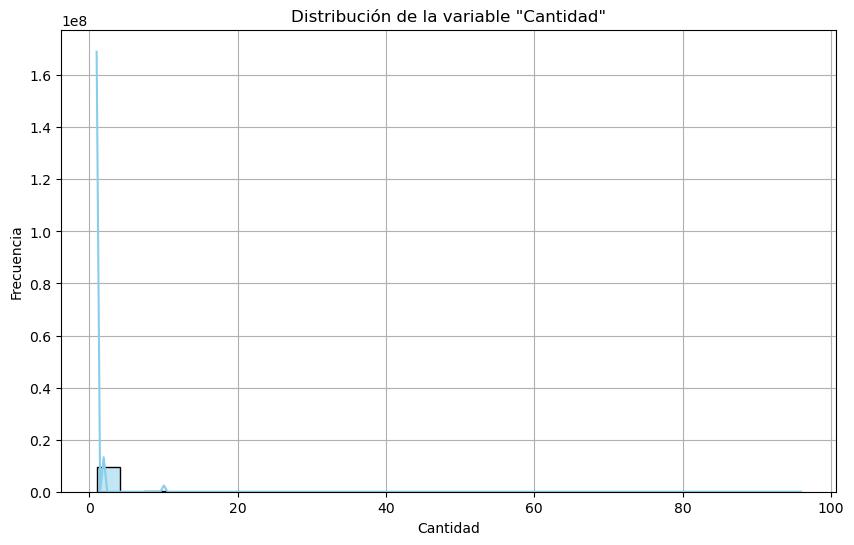

In [ ]:
df_a['Cantidad'] = pd.to_numeric(df_a['Cantidad'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df_a['Cantidad'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la variable "Cantidad"')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Utilizamos `df_a.head()` para echar un vistazo a las **primeras cinco filas** de nuestro DataFrame. Este paso es clave para verificar rápidamente que la estructura de los datos sea coherente, que las columnas tengan el contenido esperado y que no haya errores evidentes tras las transformaciones anteriores.

In [4]:
df_a.head()

,Date,Year,Month,Day,Hour,Nombre_Oficina_Arp,Nombre_Municipio_IPS2,MUNICIPIO,Nombre_Tipo_Atencion_Arp,Cantidad
0,2019-01-01,2019,1,1,0,OFICINA BOGOTA,MEDELLIN,BOGOTA,AMBULATORIA,1
1,2019-01-01,2019,1,1,0,OFICINA MEDELLIN,MEDELLIN,MEDELLIN,QUIRURGICO AMBULATORIO,1
2,2019-01-01,2019,1,1,0,OFICINA BOGOTA,MEDELLIN,BOGOTA,AMBULATORIA,5
3,2019-01-01,2019,1,1,0,OFICINA MEDELLIN,YARUMAL,SAN ANDRES DE CUERQUIA,QUIRURGICO HOSPITALARIO,1
4,2019-01-01,2019,1,1,0,OFICINA BOGOTA,MEDELLIN,BOGOTA,AMBULATORIA,1


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Rolling Mean 📊</p> 

La **media móvil** o *rolling mean* es una técnica estadística que consiste en calcular el promedio de una serie de datos dentro de una ventana de tiempo que se desplaza (o "rueda") a lo largo del conjunto de datos. Por ejemplo, una media móvil de 7 días toma el promedio de los últimos 7 días para cada punto de la serie. Esta técnica es sumamente útil para **suavizar fluctuaciones diarias** y resaltar tendencias subyacentes a lo largo del tiempo.

En nuestro contexto, la usamos para observar la evolución temporal de la variable `Cantidad`, lo cual nos da una idea más clara del comportamiento general de los datos, sin el ruido de variaciones puntuales. Esto es especialmente importante cuando usamos modelos como **XGBoost**, ya que al incluir variables como `Year`, `Month`, `Day` y `Hour`, el modelo puede beneficiarse de entender la **tendencia temporal general** detrás de los datos.

Incorporar este tipo de variables derivadas del análisis temporal ayuda a XGBoost a **identificar patrones y relaciones temporales** complejas, mejorando así la precisión y robustez de nuestras predicciones multivariables.

La función `preparar_datos` tiene como objetivo preparar el conjunto de datos para análisis avanzados o modelado. Lo que hace es lo siguiente:

1. **Conversión de la fecha**: Se asegura de que la columna `Date` esté en formato de fecha y hora (`datetime`) para poder realizar operaciones temporales correctamente.
2. **Agrupación diaria**: Agrupa los datos por fecha (`Date`) y por una o más columnas adicionales especificadas en la lista `group_cols`, sumando los valores de la columna `Cantidad`. Esto permite consolidar los datos a un nivel de detalle deseado, como por ejemplo por municipio, oficina, o tipo de atención.

In [5]:
def preparar_datos(df, group_cols):
    df['Date'] = pd.to_datetime(df['Date'])

    # Agrupación diaria por combinación
    df_diaria = df.groupby(['Date'] + group_cols, as_index=False)['Cantidad'].sum()

    return df_diaria

La función `RollingMeans` enriquece nuestro DataFrame con **variables temporales derivadas** que son cruciales para capturar patrones históricos y tendencias, elementos muy valiosos al alimentar modelos como **XGBoost**. A continuación, describimos cada paso:

1. **Ordenamiento**: Primero, organizamos los datos por fecha (`Date`) y por las columnas agrupadas (`group_cols`), asegurando que las operaciones de serie temporal se apliquen correctamente.
2. **TENDENCIA**: Se crea una columna `TENDENCIA`, que representa el número de días desde la primera fecha. Esta variable sirve como una aproximación de la evolución cronológica, útil para detectar cambios a lo largo del tiempo.
3. **Lags**: Se crean columnas de rezago (`lag_1` y `lag_7`) para capturar el valor anterior y el valor de hace una semana. Esto permite al modelo aprender de eventos pasados inmediatos o periódicos.
4. **Medias móviles**: Calculamos medias móviles de 7, 12 y 30 días (`mm_7`, `mm_12`, `mm_30`) usando un *shift(1)* para evitar fuga de información (es decir, que el modelo vea datos futuros).
5. **Delta de rezago**: La columna `delta_lag` muestra la diferencia entre el valor actual y el inmediato anterior (`lag_1`), lo cual indica cambios abruptos o tendencias recientes.
6. **Desviación estándar móvil**: Finalmente, `std_7` nos muestra la variabilidad de la serie en los últimos 7 días, permitiendo capturar fluctuaciones importantes.

👉 Esta ingeniería de características transforma una simple serie temporal en un conjunto de datos mucho más informativo y predictivo, ideal para un modelo potente como **XGBoost**.

In [6]:
def RollingMeans(df, group_cols):
    # Ordenar por combinación + fecha diaria
    df = df.sort_values(['Date'] + group_cols)

    # TENDENCIA: ahora en días
    df['TENDENCIA'] = ((df['Date'] - df['Date'].min()).dt.days).astype(int)

    # Lags
    df['lag_1'] = df.groupby(group_cols)['Cantidad'].shift(1)
    df['lag_7'] = df.groupby(group_cols)['Cantidad'].shift(7)

    # Medias móviles (shift para evitar fuga de información)
    df['mm_7'] = df.groupby(group_cols)['Cantidad'].transform(lambda x: x.shift(1).rolling(7).mean())
    df['mm_12'] = df.groupby(group_cols)['Cantidad'].transform(lambda x: x.shift(1).rolling(12).mean())
    df['mm_30'] = df.groupby(group_cols)['Cantidad'].transform(lambda x: x.shift(1).rolling(30).mean())

    # Delta y desviación estándar
    df['delta_lag'] = df['Cantidad'] - df['lag_1']
    df['std_7'] = df.groupby(group_cols)['Cantidad'].transform(lambda x: x.shift(1).rolling(7).std())

    return df

En este bloque, comenzamos definiendo las columnas clave de agrupación, como `Nombre_Oficina_Arp`, `Nombre_Municipio_IPS2`, `MUNICIPIO` y `Nombre_Tipo_Atencion_Arp`, que representan aspectos espaciales y funcionales de los datos. Luego, utilizamos la función `preparar_datos` para agrupar los datos a nivel diario según estas columnas y sumar la variable `Cantidad`. Después, aplicamos la función `RollingMeans` para enriquecer el conjunto de datos con nuevas características temporales, como rezagos, medias móviles, tendencia y desviación estándar. 


In [7]:
group_cols = ['Nombre_Oficina_Arp', 'Nombre_Municipio_IPS2', 'MUNICIPIO', 'Nombre_Tipo_Atencion_Arp']
df_b = preparar_datos(df_a, group_cols)
df_rm = RollingMeans(df_b, group_cols)

En la siguiente función, convertimos la columna `Date` a formato de fecha y hora utilizando `pd.to_datetime()`. Luego, extraemos características adicionales de la fecha, como el **día** (`Day`), el **mes** (`Month`), el **año** (`Year`) y el **día de la semana** (`Day_Week`). Finalmente, aplicamos esta transformación al DataFrame `df_rm` para enriquecer aún más la información temporal disponible.


In [8]:
def date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Day'] = df['Date'].dt.day
    df['Month'] = df['Date'].dt.month
    df['Year'] = df['Date'].dt.year
    df['Day_Week'] = df['Date'].dt.dayofweek
    
    return df

df_rm = date(df_rm)

Usamos `df_rm.head()` para visualizar las primeras cinco filas del DataFrame `df_rm` después de haber aplicado las transformaciones de fecha y de enriquecimiento temporal. Esta inspección rápida nos permite verificar que las nuevas columnas (`Day`, `Month`, `Year`, `Day_Week`) se hayan creado correctamente y que los datos estén en el formato esperado antes de continuar.


In [9]:
df_rm.head()

,Date,Nombre_Oficina_Arp,Nombre_Municipio_IPS2,MUNICIPIO,Nombre_Tipo_Atencion_Arp,Cantidad,TENDENCIA,lag_1,lag_7,mm_7,mm_12,mm_30,delta_lag,std_7,Day,Month,Year,Day_Week
0,2019-01-01,OFICINA BOGOTA,MEDELLIN,BARRANQUILLA,QUIRURGICO HOSPITALARIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
1,2019-01-01,OFICINA BOGOTA,MEDELLIN,BOGOTA,AMBULATORIA,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
2,2019-01-01,OFICINA BOGOTA,MEDELLIN,FUNZA,QUIRURGICO HOSPITALARIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
3,2019-01-01,OFICINA CALI,CHIA,SANTIAGO DE CALI,UNIDAD DE CUIDADOS INTENSIVOS,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
4,2019-01-01,OFICINA CALI,MEDELLIN,PRADERA,QUIRURGICO AMBULATORIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1


Con el código `df_rm.shape`, obtenemos las dimensiones del DataFrame `df_rm`, es decir, el número de filas y columnas para tener una visión clara de la cantidad de datos con los que estamos trabajando.

In [10]:
filas, columnas = df_rm.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 8177031
Número de columnas: 18



Finalmente guardamos el DataFrame `df_rm` como un archivo CSV llamado `base_rm.csv`. Usamos `index=False` para evitar que se guarde el índice del DataFrame como una columna adicional en el archivo. Además, especificamos `encoding='utf-8'` para asegurarnos de que el archivo sea altamente compatible.


In [11]:
df_rm.to_csv('base_rm.csv', index=False, encoding='utf-8')

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Codificar Variables 🔠</p>  

La **codificación de variables** es un paso fundamental en el preprocesamiento de datos, especialmente cuando trabajamos con modelos de machine learning. Muchas veces, las variables categóricas (como nombres de ciudades, tipos de atención o categorías) no pueden ser procesadas directamente por los algoritmos, que generalmente requieren valores numéricos. La codificación convierte estas variables categóricas en una forma que el modelo puede entender. Dependiendo de la naturaleza de las variables, se pueden utilizar diferentes técnicas de codificación, como **One-Hot Encoding**, **Label Encoding** o **Target Encoding**, para convertirlas en valores numéricos adecuados.

En este bloque de código, cargamos el archivo CSV previamente guardado `base_rm.csv` usando `pd.read_csv()`, asegurándonos de utilizar la codificación `utf-8` para manejar correctamente los caracteres especiales. Luego, restablecemos el índice con `reset_index(drop=True)` para evitar que el índice original se convierta en una columna adicional. Posteriormente, convertimos la columna `Date` a formato de fecha utilizando `pd.to_datetime()` para trabajar correctamente con datos temporales.

A continuación, ordenamos el DataFrame por fecha usando `sort_values('Date')` para que los datos estén en orden cronológico. Finalmente, utilizamos `df_rm.shape` para obtener las dimensiones del DataFrame y mostrar el número de filas y columnas, lo cual nos ayuda a verificar la estructura de los datos cargados.

In [4]:
df_rm = pd.read_csv('base_rm.csv', encoding='utf-8', low_memory=False)
df_rm = df_rm.reset_index(drop=True)
df_rm['Date'] = pd.to_datetime(df_rm['Date'])

df_rm = df_rm.sort_values('Date')

filas, columnas = df_rm.shape
print(f"Número de filas: {filas}")
print(f"Número de columnas: {columnas}")

Número de filas: 8177031
Número de columnas: 16


El comando `df_rm.head()` se utiliza para mostrar las primeras cinco filas del DataFrame `df_rm`.

In [5]:
df_rm.head()

,Date,Nombre_Oficina_Arp,Nombre_Municipio_IPS2,MUNICIPIO,Nombre_Tipo_Atencion_Arp,Cantidad,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,std_7,Day,Month,Year
0,2019-01-01,OFICINA BOGOTA,MEDELLIN,BARRANQUILLA,QUIRURGICO HOSPITALARIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019
1,2019-01-01,OFICINA BOGOTA,MEDELLIN,BOGOTA,AMBULATORIA,7,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019
2,2019-01-01,OFICINA BOGOTA,MEDELLIN,FUNZA,QUIRURGICO HOSPITALARIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019
3,2019-01-01,OFICINA CALI,CHIA,SANTIAGO DE CALI,UNIDAD DE CUIDADOS INTENSIVOS,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019
4,2019-01-01,OFICINA CALI,MEDELLIN,PRADERA,QUIRURGICO AMBULATORIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019


In [7]:
df_rm.head()

,Date,Nombre_Oficina_Arp,Nombre_Municipio_IPS2,MUNICIPIO,Nombre_Tipo_Atencion_Arp,Cantidad,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,std_7,Day,Month,Year,Day_Week
0,2019-01-01,OFICINA BOGOTA,MEDELLIN,BARRANQUILLA,QUIRURGICO HOSPITALARIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
1,2019-01-01,OFICINA BOGOTA,MEDELLIN,BOGOTA,AMBULATORIA,7,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
2,2019-01-01,OFICINA BOGOTA,MEDELLIN,FUNZA,QUIRURGICO HOSPITALARIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
3,2019-01-01,OFICINA CALI,CHIA,SANTIAGO DE CALI,UNIDAD DE CUIDADOS INTENSIVOS,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1
4,2019-01-01,OFICINA CALI,MEDELLIN,PRADERA,QUIRURGICO AMBULATORIO,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2019,1


In [ ]:
df_rm.to_csv('base_rm.csv', index=False, encoding='utf-8')

En este bloque de código, comenzamos asegurándonos de que la columna `Cantidad` esté en formato numérico utilizando `pd.to_numeric()`. Si se encuentra algún valor no numérico, el parámetro `errors='coerce'` convertirá esos valores a `NaN` para evitar errores en el análisis posterior.

Luego, creamos un histograma utilizando `sns.histplot()` para visualizar la distribución de la variable `Cantidad`. Este análisis visual es útil para entender la distribución de la variable y detectar posibles sesgos o valores atípicos.

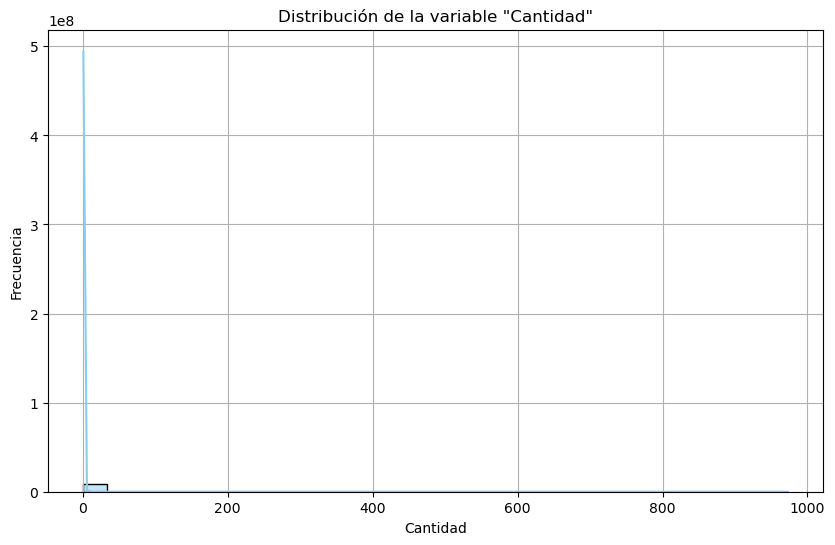

In [ ]:
df_rm['Cantidad'] = pd.to_numeric(df_rm['Cantidad'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.histplot(df_rm['Cantidad'], bins=30, kde=True, color='skyblue')
plt.title('Distribución de la variable "Cantidad"')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

En este bloque de código, aplicamos la técnica de **One-Hot Encoding** a las columnas categóricas `Nombre_Oficina_Arp` y `Nombre_Tipo_Atencion_Arp` utilizando la función `pd.get_dummies()`. Esta técnica convierte las categorías de estas columnas en variables binarias (0 o 1), creando nuevas columnas para cada categoría única en esas variables. Esto permite que los modelos de machine learning, como XGBoost, puedan procesar estas variables de manera adecuada, ya que no pueden manejar directamente datos categóricos.

Finalmente, usamos `df_encoded_rm.head()` para visualizar las primeras filas del DataFrame resultante y confirmar que las columnas se han codificado correctamente.

In [8]:
#One-Hot-Encode
df_encoded_rm = pd.get_dummies(df_rm, columns=['Nombre_Oficina_Arp', 'Nombre_Tipo_Atencion_Arp'])

df_encoded_rm.head()

,Date,Nombre_Municipio_IPS2,MUNICIPIO,Cantidad,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,...,Nombre_Oficina_Arp_OFICINA MANIZALES,Nombre_Oficina_Arp_OFICINA MEDELLIN,Nombre_Oficina_Arp_OFICINA PEREIRA,Nombre_Tipo_Atencion_Arp_ALTA INMEDIATA,Nombre_Tipo_Atencion_Arp_AMBULATORIA,Nombre_Tipo_Atencion_Arp_HOSPITALARIA,Nombre_Tipo_Atencion_Arp_ODONTOLOGIA,Nombre_Tipo_Atencion_Arp_QUIRURGICO AMBULATORIO,Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO,Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS
0,2019-01-01,MEDELLIN,BARRANQUILLA,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
1,2019-01-01,MEDELLIN,BOGOTA,7,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
2,2019-01-01,MEDELLIN,FUNZA,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
3,2019-01-01,CHIA,SANTIAGO DE CALI,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
4,2019-01-01,MEDELLIN,PRADERA,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False


El comando `df_encoded_rm.columns` se utiliza para mostrar los nombres de todas las columnas del DataFrame `df_encoded_rm` después de haber aplicado el One-Hot Encoding. Esto nos permite verificar que las nuevas columnas creadas a partir de las variables categóricas, como `Nombre_Oficina_Arp` y `Nombre_Tipo_Atencion_Arp`, se hayan añadido correctamente.

In [9]:
df_encoded_rm.columns

Index(['Date', 'Nombre_Municipio_IPS2', 'MUNICIPIO', 'Cantidad', 'TENDENCIA',
       'lag_1', 'lag_7', 'mm_7', 'mm_12', 'delta_lag', 'std_7', 'Day', 'Month',
       'Year', 'Day_Week', 'Nombre_Oficina_Arp_OFICINA BARRANQUILLA',
       'Nombre_Oficina_Arp_OFICINA BOGOTA',
       'Nombre_Oficina_Arp_OFICINA BUCARAMANGA',
       'Nombre_Oficina_Arp_OFICINA CALI',
       'Nombre_Oficina_Arp_OFICINA CARTAGENA',
       'Nombre_Oficina_Arp_OFICINA MANIZALES',
       'Nombre_Oficina_Arp_OFICINA MEDELLIN',
       'Nombre_Oficina_Arp_OFICINA PEREIRA',
       'Nombre_Tipo_Atencion_Arp_ALTA INMEDIATA',
       'Nombre_Tipo_Atencion_Arp_AMBULATORIA',
       'Nombre_Tipo_Atencion_Arp_HOSPITALARIA',
       'Nombre_Tipo_Atencion_Arp_ODONTOLOGIA',
       'Nombre_Tipo_Atencion_Arp_QUIRURGICO AMBULATORIO',
       'Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO',
       'Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS'],
      dtype='object')

En este bloque de código, aplicamos **Label Encoding** a las columnas `Nombre_Municipio_IPS2` y `MUNICIPIO`, que contienen muchas categorías diferentes. Usamos el objeto `LabelEncoder()` de `sklearn` para asignar un valor numérico único a cada categoría en estas columnas. La función `fit_transform()` se encarga de ajustar el codificador y transformar los valores de las columnas en etiquetas numéricas.

Luego, creamos dos diccionarios (`municipio_ips_dict` y `municipio_dict`) que mapean las etiquetas numéricas de vuelta a sus respectivas categorías originales. Esto nos permite consultar la correspondencia entre las categorías y sus valores codificados en caso de que necesitemos interpretar los resultados más adelante.

Finalmente, usamos `df_encoded_rm.head()` para visualizar las primeras filas del DataFrame `df_encoded_rm` y verificar que el Label Encoding se haya aplicado correctamente.

In [10]:
# Label Encoding para municipios (muchas categorías)

lip = LabelEncoder()
lm = LabelEncoder()


df_encoded_rm['Nombre_Municipio_IPS2'] = lip.fit_transform(df_rm['Nombre_Municipio_IPS2'])
df_encoded_rm['MUNICIPIO'] = lm.fit_transform(df_rm['MUNICIPIO'])

municipio_ips_dict = dict(zip(lip.transform(lip.classes_), lip.classes_))
municipio_dict = dict(zip(lm.transform(lm.classes_), lm.classes_))

df_encoded_rm.head()

,Date,Nombre_Municipio_IPS2,MUNICIPIO,Cantidad,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,...,Nombre_Oficina_Arp_OFICINA MANIZALES,Nombre_Oficina_Arp_OFICINA MEDELLIN,Nombre_Oficina_Arp_OFICINA PEREIRA,Nombre_Tipo_Atencion_Arp_ALTA INMEDIATA,Nombre_Tipo_Atencion_Arp_AMBULATORIA,Nombre_Tipo_Atencion_Arp_HOSPITALARIA,Nombre_Tipo_Atencion_Arp_ODONTOLOGIA,Nombre_Tipo_Atencion_Arp_QUIRURGICO AMBULATORIO,Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO,Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS
0,2019-01-01,80,88,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
1,2019-01-01,80,108,7,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,True,False,False,False,False,False
2,2019-01-01,80,354,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,True,False
3,2019-01-01,21,892,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,True
4,2019-01-01,80,684,1,0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,True,False,False


El comando `df_encoded_rm.dtypes` se utiliza para mostrar los tipos de datos de cada columna en el DataFrame `df_encoded_rm`. Este paso es fundamental para verificar que todas las transformaciones, como el One-Hot Encoding y el Label Encoding, se hayan realizado correctamente y que las columnas tengan el tipo de dato adecuado.

In [11]:
df_encoded_rm.dtypes

Date                                                      datetime64[ns]
Nombre_Municipio_IPS2                                              int32
MUNICIPIO                                                          int32
Cantidad                                                           int64
TENDENCIA                                                          int64
lag_1                                                            float64
lag_7                                                            float64
mm_7                                                             float64
mm_12                                                            float64
delta_lag                                                        float64
std_7                                                            float64
Day                                                                int64
Month                                                              int64
Year                                               

Ahora usamos el método `dropna()` para eliminar las filas del DataFrame `df_encoded_rm` que contienen valores nulos (`NaN`) en cualquiera de las columnas especificadas: `lag_1`, `lag_7`, `mm_7`, `mm_12`, `delta_lag` y `std_7`. Estas columnas son el resultado de las transformaciones de medias móviles y lags, y es común que contengan valores `NaN` al principio de los datos debido a la falta de datos previos para calcular los lags o medias móviles.

El parámetro `subset` especifica las columnas en las que buscamos valores `NaN`, y solo las filas que contengan valores faltantes en alguna de estas columnas serán eliminadas del DataFrame.

In [12]:
df_encoded_rm = df_encoded_rm.dropna(subset=['lag_1', 'lag_7', 'mm_7', 'mm_12', 'delta_lag', 'std_7'])

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">5. Entrenamiento del Modelo 🤖 </p> 

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Division ➗</p>  

En este bloque de código, dividimos el DataFrame `df_encoded_rm` en dos conjuntos: uno de entrenamiento (`train`) y otro de prueba (`test`). La división se realiza según una fecha de corte (`cutoff`), que es el 31 de diciembre de 2023. Los datos con una fecha menor o igual a esta son asignados al conjunto de entrenamiento, mientras que los datos con una fecha posterior se asignan al conjunto de prueba.

Luego, se separan las características (X) y la variable objetivo (y) para ambos conjuntos. Para el conjunto de entrenamiento, `X_train` contiene las características y `y_train` la variable objetivo `Cantidad`. Lo mismo se aplica al conjunto de prueba con `X_test` y `y_test`.

A continuación, se optimizan los tipos de datos de `X_train` y `X_test` para mejorar el rendimiento de la memoria y el procesamiento. Las columnas de tipo `float64` se convierten en `float32`, las de tipo `int32` en `int16`, y las columnas booleanas se transforman en `int8`. Esto reduce el uso de memoria sin perder precisión.

Después, convertimos los datos a formato compatible con la GPU utilizando la biblioteca `cupy` para acelerar el entrenamiento del modelo. Convertimos `X_train`, `y_train`, `X_test` y `y_test` en arreglos de `cupy`, lo que permite realizar cálculos más rápidos en la GPU.

Finalmente, se crea la estructura `DMatrix` de XGBoost, que es la forma optimizada que XGBoost utiliza para entrenar el modelo, tanto para los datos de entrenamiento como para los de prueba.

Las formas de los conjuntos de datos se verifican al final, asegurándonos de que la división y las transformaciones se hayan realizado correctamente.

In [13]:
# Dividir datos
cutoff = pd.to_datetime('2023-12-31')
train = df_encoded_rm[df_encoded_rm['Date'] <= cutoff]
test = df_encoded_rm[df_encoded_rm['Date'] > cutoff]

X_train = train.drop(columns=['Date', 'Cantidad'])
y_train = train['Cantidad']

X_test = test.drop(columns=['Date', 'Cantidad'])
y_test = test['Cantidad']

# Optimizar tipos para X_train
X_train_opt = X_train.copy()
for col in X_train_opt.columns:
    if X_train_opt[col].dtype == 'float64':
        X_train_opt[col] = X_train_opt[col].astype('float32')
    elif X_train_opt[col].dtype == 'int32':
        X_train_opt[col] = X_train_opt[col].astype('int16')
    elif X_train_opt[col].dtype == 'bool':
        X_train_opt[col] = X_train_opt[col].astype('int8')

# Hacer lo mismo para X_test
X_test_opt = X_test.copy()
for col in X_test_opt.columns:
    if X_test_opt[col].dtype == 'float64':
        X_test_opt[col] = X_test_opt[col].astype('float32')
    elif X_test_opt[col].dtype == 'int32':
        X_test_opt[col] = X_test_opt[col].astype('int16')
    elif X_test_opt[col].dtype == 'bool':
        X_test_opt[col] = X_test_opt[col].astype('int8')

# Convertir a GPU (cupy)
X_train_gpu = cp.asarray(X_train_opt.to_numpy())
y_train_gpu = cp.asarray(y_train.to_numpy())

X_test_gpu = cp.asarray(X_test_opt.to_numpy())
y_test_gpu = cp.asarray(y_test.to_numpy())

# Estructura DMatrix en GPU
dtrain = xgb.DMatrix(X_train_gpu, label=y_train_gpu)
dtest = xgb.DMatrix(X_test_gpu, label=y_test_gpu)

# Verificar formas
print("X shape:", df_encoded_rm.shape)
print("X_train shape:", X_train_gpu.shape)
print("y_train shape:", y_train_gpu.shape)
print("X_test shape:", X_test_gpu.shape)
print("y_test shape:", y_test_gpu.shape)

X shape: (7761440, 30)
X_train shape: (6412165, 28)
y_train shape: (6412165,)
X_test shape: (1349275, 28)
y_test shape: (1349275,)


El comando `X_train_opt.head()` se utiliza para mostrar las primeras filas del DataFrame `X_train_opt`, que es el conjunto de datos de características (`X_train`) después de haber sido optimizado en cuanto a tipos de datos. Esto nos permite inspeccionar visualmente las primeras filas y asegurarnos de que las transformaciones de los tipos de datos (como convertir `float64` a `float32` y `int32` a `int16`) se hayan realizado correctamente.

In [14]:
X_train_opt.head()

,Nombre_Municipio_IPS2,MUNICIPIO,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,std_7,Day,...,Nombre_Oficina_Arp_OFICINA MANIZALES,Nombre_Oficina_Arp_OFICINA MEDELLIN,Nombre_Oficina_Arp_OFICINA PEREIRA,Nombre_Tipo_Atencion_Arp_ALTA INMEDIATA,Nombre_Tipo_Atencion_Arp_AMBULATORIA,Nombre_Tipo_Atencion_Arp_HOSPITALARIA,Nombre_Tipo_Atencion_Arp_ODONTOLOGIA,Nombre_Tipo_Atencion_Arp_QUIRURGICO AMBULATORIO,Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO,Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS
242,80,547,1,1.0,1.0,2.857143,2.250000,2.0,2.911390,2,...,0,1,0,0,1,0,0,0,0,0
243,80,108,1,1.0,2.0,7.571429,5.333333,0.0,14.785771,2,...,0,0,0,0,1,0,0,0,0,0
248,80,108,1,1.0,41.0,7.428571,4.833333,0.0,14.853251,2,...,0,0,0,0,1,0,0,0,0,0
254,80,108,1,1.0,1.0,1.714286,4.833333,0.0,1.253566,2,...,0,0,0,0,1,0,0,0,0,0
304,80,547,1,3.0,8.0,3.142857,2.333333,11.0,2.794553,2,...,0,1,0,0,1,0,0,0,0,0


En este bloque de código, se visualiza la distribución de las variables objetivo (`y_train` y `y_test`) a través de dos histogramas. El primero muestra la distribución de `y_train`, que corresponde a los valores de la variable objetivo en el conjunto de entrenamiento, mientras que el segundo muestra la distribución de `y_test`, que corresponde a los valores en el conjunto de prueba.

Utilizamos `plt.hist()` para crear los histogramas y especificamos el número de bins (30) para controlar la cantidad de intervalos en los que se divide la variable. Los colores de los histogramas son `azul` para `y_train` y `rojo` para `y_test`, lo que permite diferenciar claramente ambos conjuntos.

Estos histogramas nos permiten observar cómo se distribuyen los valores de la variable objetivo en ambos conjuntos de datos y verificar si existen diferencias importantes entre ellos. Esto puede ser útil para detectar posibles sesgos o desbalances en los datos.

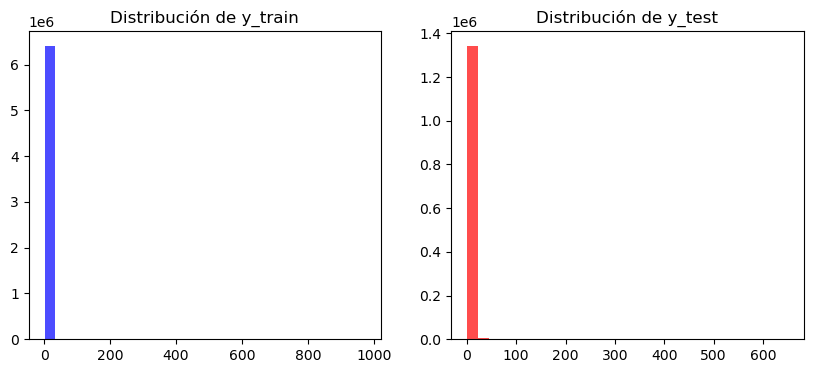

In [59]:
# Distribución de y_train vs y_test
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, color='blue', alpha=0.7)
plt.title('Distribución de y_train')
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, color='red', alpha=0.7)
plt.title('Distribución de y_test')
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Hiperparametrizacion del Modelo ⚙️ </p>   

En este bloque de código, definimos una función `objective(trial)` que será utilizada para la optimización de hiperparámetros utilizando `Optuna`. La función toma un argumento `trial`, que es el objeto utilizado por `Optuna` para realizar las sugerencias de los valores de los hiperparámetros.

**Hiperparámetros a optimizar:**
Se definen varios hiperparámetros del modelo XGBoost (`XGBRegressor`) que serán optimizados a través de la búsqueda:
- `learning_rate`: Tasa de aprendizaje, que controla el tamaño de los pasos durante el entrenamiento.
- `max_depth`: Profundidad máxima del árbol, que controla la complejidad del modelo.
- `subsample`: Fracción de datos utilizados para entrenar cada árbol, que ayuda a prevenir el sobreajuste.
- `colsample_bytree`: Fracción de las características utilizadas para entrenar cada árbol.
- `gamma`: Controla la regularización para evitar el sobreajuste.
- `lambda` y `alpha`: Parámetros de regularización L2 (lambda) y L1 (alpha).
- `n_estimators`: Número de árboles en el modelo.
- `early_stopping_rounds`: Número de rondas sin mejora antes de detener el entrenamiento.

**Entrenamiento y Evaluación:**
- Se entrena el modelo utilizando `X_train_gpu` y `y_train_gpu` (los datos convertidos a formato GPU).
- `eval_set` se utiliza para especificar un conjunto de validación durante el entrenamiento, en este caso, `X_test_gpu` y `y_test_gpu`.
- Tras entrenar el modelo, se realizan predicciones con `model.predict()` sobre el conjunto de prueba y se calcula el `RMSE` (Root Mean Squared Error) utilizando la función `mean_squared_error()`. El RMSE es una métrica utilizada para evaluar la precisión del modelo en los datos de prueba.

Finalmente, la función devuelve el `RMSE`, que será utilizado por `Optuna` para evaluar la calidad de las combinaciones de hiperparámetros y encontrar la mejor configuración para el modelo.

In [17]:
def objective(trial):
    # Hiperparámetros que se van a optimizar
    param = {
        "objective": "reg:squarederror",
        "device":"cuda",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 5),
        "lambda": trial.suggest_float("lambda", 1e-3, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 500),
        "early_stopping_rounds":20
    }

    # Entrenamiento
    model = xgb.XGBRegressor(**param, random_state=42)
    
    model.fit(
        X_train_gpu, y_train_gpu, 
        eval_set=[(X_test_gpu, y_test_gpu)],
        verbose=False)

    # Predicción y evaluación
    y_pred = model.predict(X_test_gpu)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return rmse

Este bloque de código utiliza `Optuna` para optimizar los hiperparámetros de un modelo XGBoost. Se crea un estudio con `optuna.create_study(direction="minimize")` para minimizar el `RMSE`. Luego, `study.optimize(objective, n_trials=100, timeout=3600)` ejecuta 100 intentos de optimización, con un límite de tiempo de 1 hora. En cada intento, `Optuna` ajusta los hiperparámetros del modelo XGBoost para mejorar su rendimiento y encontrar la mejor configuración posible.

In [18]:
study = optuna.create_study(direction="minimize")

study.optimize(objective, n_trials=100, timeout=3600)

[I 2025-04-24 19:08:18,718] A new study created in memory with name: no-name-2d7b61b6-3f98-4182-a1c7-f258713cc30a
[I 2025-04-24 19:08:22,101] Trial 0 finished with value: 1.4178275431028724 and parameters: {'learning_rate': 0.1925789698225538, 'max_depth': 4, 'subsample': 0.5192771949035422, 'colsample_bytree': 0.9383938148826372, 'gamma': 1.527391324575706, 'lambda': 0.27255646365042446, 'alpha': 0.10300572182144085, 'n_estimators': 156}. Best is trial 0 with value: 1.4178275431028724.
[I 2025-04-24 19:08:26,217] Trial 1 finished with value: 1.7578737968772313 and parameters: {'learning_rate': 0.21565523853647797, 'max_depth': 8, 'subsample': 0.9857557393648504, 'colsample_bytree': 0.6899005483269083, 'gamma': 2.9121803632859287, 'lambda': 0.28334373401425444, 'alpha': 0.6529050585037762, 'n_estimators': 434}. Best is trial 0 with value: 1.4178275431028724.
[I 2025-04-24 19:08:30,075] Trial 2 finished with value: 1.3905595335960026 and parameters: {'learning_rate': 0.17116475828217725

✅📊 Resultado

In [19]:
print("Mejores hiperparámetros:")
print(study.best_params)

print("Mejor RMSE:")
print(study.best_value)

best_params_study = study.best_params

Mejores hiperparámetros:
{'learning_rate': 0.13885950089105642, 'max_depth': 4, 'subsample': 0.9394067504888292, 'colsample_bytree': 0.6889512020025766, 'gamma': 3.9673344536177053, 'lambda': 0.023814343152790428, 'alpha': 1.4596890089856196, 'n_estimators': 192}
Mejor RMSE:
1.276445177595355


In [20]:
best_params = {'learning_rate': 0.13885950089105642, 
               'max_depth': 4, 
               'subsample': 0.9394067504888292, 
               'colsample_bytree': 0.6889512020025766, 
               'gamma': 3.9673344536177053, 
               'lambda': 0.023814343152790428, 
               'alpha': 1.4596890089856196, 
               'n_estimators': 192}

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Modelo 🧠 </p>   

Se configuran los mejores hiperparámetros para el modelo XGBoost utilizando los valores encontrados por `Optuna`. El modelo se entrena con `xgb.train()`, usando datos de entrenamiento y prueba. Se aplica `early_stopping_rounds` para evitar el sobreajuste y detener el entrenamiento si no hay mejoras.

In [21]:
params = {
    'objective': 'reg:squarederror',
    "device":"cuda",
    'learning_rate': best_params['learning_rate'],
    'max_depth': best_params['max_depth'],
    'subsample': best_params['subsample'],
    'colsample_bytree': best_params['colsample_bytree'],
    'gamma': best_params['gamma'],
    'lambda': best_params['lambda'],
    'alpha': best_params['alpha'],
    'eval_metric': 'rmse'
}

model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=best_params['n_estimators'],  # ¡Importante!
    evals=[(dtest, 'Test'), (dtrain, 'Train')],
    early_stopping_rounds=20,
    verbose_eval=True
)

[0]	Test-rmse:7.21041	Train-rmse:2.61717
[1]	Test-rmse:7.20697	Train-rmse:2.60773
[2]	Test-rmse:7.20385	Train-rmse:2.59908
[3]	Test-rmse:6.50887	Train-rmse:2.27228
[4]	Test-rmse:5.68784	Train-rmse:1.99069
[5]	Test-rmse:5.17776	Train-rmse:1.75475
[6]	Test-rmse:4.55215	Train-rmse:1.54893
[7]	Test-rmse:4.55089	Train-rmse:1.54513
[8]	Test-rmse:4.54996	Train-rmse:1.54150
[9]	Test-rmse:4.02377	Train-rmse:1.37145
[10]	Test-rmse:4.02270	Train-rmse:1.36784
[11]	Test-rmse:4.02188	Train-rmse:1.36585
[12]	Test-rmse:4.02140	Train-rmse:1.36430
[13]	Test-rmse:4.02100	Train-rmse:1.36242
[14]	Test-rmse:3.62739	Train-rmse:1.20569
[15]	Test-rmse:3.30725	Train-rmse:1.08223
[16]	Test-rmse:3.30682	Train-rmse:1.08058
[17]	Test-rmse:2.96405	Train-rmse:0.98015
[18]	Test-rmse:2.72734	Train-rmse:0.87270
[19]	Test-rmse:2.56038	Train-rmse:0.80114
[20]	Test-rmse:2.35443	Train-rmse:0.71906
[21]	Test-rmse:2.35371	Train-rmse:0.71669
[22]	Test-rmse:2.20605	Train-rmse:0.64896
[23]	Test-rmse:2.08362	Train-rmse:0.59301
[2

En este bloque, se hace una predicción con el modelo entrenado (`model.predict(dtest)`) sobre los datos de prueba (`dtest`). Luego, se calcula el error cuadrático medio (RMSE) y el coeficiente de determinación (R²) para evaluar el rendimiento del modelo. Finalmente, se imprimen ambos resultados.

In [22]:

# Modelo
y_pred = model.predict(dtest)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Modelo - RMSE:", rmse, "R²:", r2)


Modelo - RMSE: 1.372883062948589 R²: 0.9723985627813639


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">6. Resultados 📊 </p>  

Este bloque de código genera una gráfica comparando los primeros 100 valores reales (`y_test`) con las predicciones del modelo (`y_pred`). Se utiliza `plt.plot()` para trazar ambas series, donde la serie real se muestra en color negro y la predicción en línea discontinua. La gráfica ayuda a visualizar el rendimiento del modelo al comparar las predicciones con los valores reales.

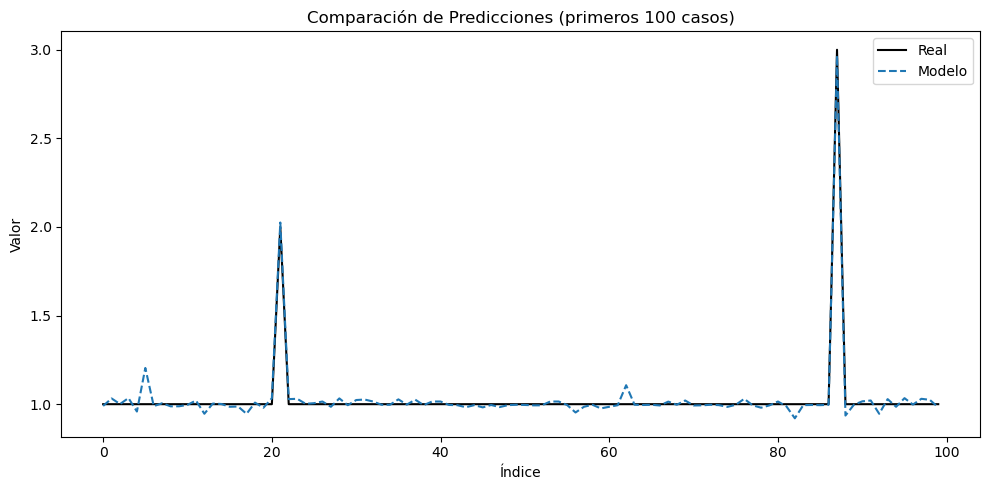

In [32]:
plt.figure(figsize=(10, 5))

plt.plot(y_test[:100], label='Real', color='black')
plt.plot(y_pred[:100], label='Modelo', linestyle='--')
plt.title("Comparación de Predicciones (primeros 100 casos)")
plt.xlabel("Índice")
plt.ylabel("Valor")
plt.legend()
plt.tight_layout()
plt.show()

Usamos la función `plot_importance()` de XGBoost para visualizar la importancia de las variables en el modelo. Cada variable se muestra con su contribución al modelo, permitiendo identificar cuáles tienen mayor impacto en las predicciones. 

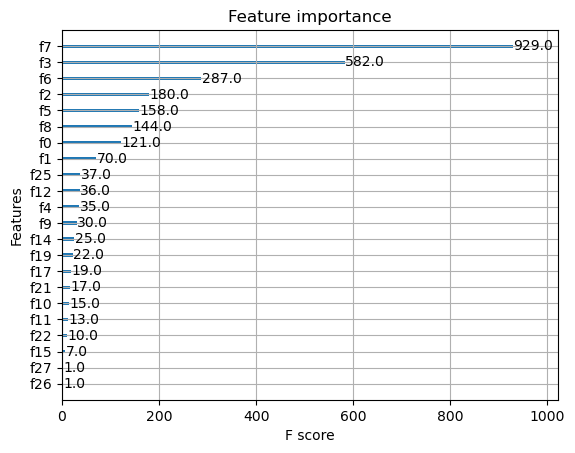

In [33]:
#Importancia de variables
plot_importance(model)
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Metricas Generales 📏 </p>  

A continuación, se calcula y muestra tres métricas de evaluación del modelo: el error cuadrático medio (RMSE), el error absoluto medio (MAE) y el coeficiente de determinación (R²). Utilizando las funciones `mean_squared_error`, `mean_absolute_error` y `r2_score`, se obtienen las métricas sobre los datos de prueba (`y_test` y `y_pred`).


In [34]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 1.3729
MAE: 0.0564
R²: 0.9724


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Metricas en los Picos ⛰️ </p>   

Este bloque calcula el RMSE solo para los picos (valores altos reales) de los datos, considerando aquellos valores por encima del percentil 90. Primero, crea una máscara para filtrar estos picos y luego calcula el RMSE específicamente para esos valores.

In [35]:
# Asegurar vectores 1D
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

# Crear la máscara para picos (valores altos reales)
umbral_picos = np.percentile(y_test, 90)
mask_picos = y_test > umbral_picos

# Calcular RMSE solo en picos
rmse_picos = mean_squared_error(y_test[mask_picos], y_pred[mask_picos], squared=False)

print(f"RMSE en picos reales (> p90): {rmse_picos:.4f}")

RMSE en picos reales (> p90): 4.7557


Este bloque de código genera un gráfico de dispersión que compara los valores reales (`y_test`) con los predichos (`y_pred`). La línea roja discontinua indica una relación perfecta entre ambos, es decir, cuando los valores reales y predichos son iguales. Este gráfico ayuda a visualizar qué tan bien el modelo ha predicho los valores reales, donde los puntos más cercanos a la línea roja indican mejores predicciones.

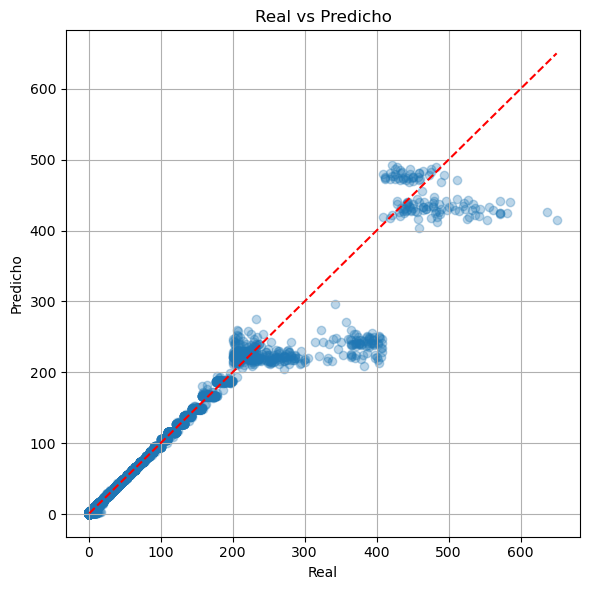

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.title("Real vs Predicho")
plt.grid(True)
plt.tight_layout()
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> General 🌍 </p>  

En este fragmento de código, primero se asegura que las variables `y_test` y `y_pred` sean arrays unidimensionales utilizando `np.ravel()`. Luego, el índice de `X_test` se restablece. Posteriormente, se calculan dos tipos de error:

1. **Error absoluto**: Se calcula como la diferencia absoluta entre los valores reales (`y_test`) y los predichos (`y_pred`).
2. **Error relativo**: Se obtiene dividiendo el error absoluto entre el valor máximo de `y_test` o 1, evitando así la división por cero.

Finalmente, se define un umbral para detectar los **picos** (valores más altos), tomando el percentil 90 de `y_test`. Los valores que superan este umbral se etiquetan como "pico".

In [ ]:
# Creacion del dataframe general
# Asegura que sean arrays planos
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)

X_test = X_test.reset_index(drop=True)

# Calcular errores
error_abs = np.abs(y_test - y_pred)
error_rel = error_abs / np.maximum(y_test, 1)  # evita división por 0

# Etiqueta si es pico
umbral_picos = np.percentile(y_test, 90)
es_pico = y_test > umbral_picos

NameError: name 'np' is not defined

Creamos el DataFrame `df_resultado` con las predicciones, errores y una etiqueta para identificar picos (valores reales por encima del percentil 90). Esto nos permite analizar fácilmente el rendimiento del modelo en distintos contextos.

In [38]:
df_resultado = X_test.copy()
df_resultado['Valor_Real'] = y_test
df_resultado['Prediccion'] = y_pred
df_resultado['Error_Absoluto'] = error_abs
df_resultado['Error_Relativo'] = error_rel
df_resultado['Es_Pico'] = es_pico

df_resultado.head()

,Nombre_Municipio_IPS2,MUNICIPIO,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,std_7,Day,...,Nombre_Tipo_Atencion_Arp_HOSPITALARIA,Nombre_Tipo_Atencion_Arp_ODONTOLOGIA,Nombre_Tipo_Atencion_Arp_QUIRURGICO AMBULATORIO,Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO,Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS,Valor_Real,Prediccion,Error_Absoluto,Error_Relativo,Es_Pico
0,9,745,1825,1.0,1.0,1.142857,1.083333,0.0,0.377964,31,...,False,False,False,False,False,1,0.990120,0.009880,0.009880,False
1,156,1071,1825,1.0,1.0,1.428571,1.500000,0.0,0.786796,31,...,False,False,True,False,False,1,1.032283,0.032283,0.032283,False
2,9,108,1825,1.0,10.0,2.285714,1.750000,0.0,3.401680,31,...,False,False,True,False,False,1,1.000766,0.000766,0.000766,False
3,80,547,1825,1.0,1.0,1.142857,1.166667,0.0,0.377964,31,...,False,False,False,True,False,1,1.034548,0.034548,0.034548,False
4,80,547,1825,1.0,15.0,3.142857,2.250000,0.0,5.241774,31,...,False,False,True,False,False,1,0.958578,0.041422,0.041422,False


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> 7. Reconstruccion de los datos 🔄 </p> 

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Decodificador 🔓 </p> 

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Label Encoder 🔙</p> 

Aplicamos Label Encoding inverso para devolver los nombres originales de los municipios (`Nombre_Municipio_IPS2` y `MUNICIPIO`) en el DataFrame `df_label`, facilitando así su interpretación.

In [39]:
df_label = df_resultado.copy()

df_label['Nombre_Municipio_IPS2'] = df_label['Nombre_Municipio_IPS2'].map(municipio_ips_dict)
df_label['MUNICIPIO'] = df_label['MUNICIPIO'].map(municipio_dict)

df_label.head()

,Nombre_Municipio_IPS2,MUNICIPIO,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,std_7,Day,...,Nombre_Tipo_Atencion_Arp_HOSPITALARIA,Nombre_Tipo_Atencion_Arp_ODONTOLOGIA,Nombre_Tipo_Atencion_Arp_QUIRURGICO AMBULATORIO,Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO,Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS,Valor_Real,Prediccion,Error_Absoluto,Error_Relativo,Es_Pico
0,BOGOTA,RICAURTE-CUNDINAMARCA,1825,1.0,1.0,1.142857,1.083333,0.0,0.377964,31,...,False,False,False,False,False,1,0.990120,0.009880,0.009880,False
1,VILLAVICENCIO,VILLAVICENCIO-META,1825,1.0,1.0,1.428571,1.500000,0.0,0.786796,31,...,False,False,True,False,False,1,1.032283,0.032283,0.032283,False
2,BOGOTA,BOGOTA,1825,1.0,10.0,2.285714,1.750000,0.0,3.401680,31,...,False,False,True,False,False,1,1.000766,0.000766,0.000766,False
3,MEDELLIN,MEDELLIN,1825,1.0,1.0,1.142857,1.166667,0.0,0.377964,31,...,False,False,False,True,False,1,1.034548,0.034548,0.034548,False
4,MEDELLIN,MEDELLIN,1825,1.0,15.0,3.142857,2.250000,0.0,5.241774,31,...,False,False,True,False,False,1,0.958578,0.041422,0.041422,False


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> One-Hot-Encoding 🎯 </p>  

Revertimos el One-Hot Encoding para las variables categóricas `Nombre_Oficina_Arp` y `Nombre_Tipo_Atencion_Arp`, reconstruyendo sus valores originales en el DataFrame `df_hot`, lo que permite una interpretación más clara y directa de los resultados.

In [40]:
df_hot = df_label.copy()

#Nombre_Oficina_Arp
cols_oficina = [col for col in df_hot.columns if col.startswith('Nombre_Oficina_Arp_')]

# Reconstruir el nombre del municipio
df_hot['Nombre_Oficina_Arp'] = df_hot[cols_oficina].idxmax(axis=1)
df_hot['Nombre_Oficina_Arp'] = df_hot['Nombre_Oficina_Arp'].str.replace('Nombre_Oficina_Arp_', '')

#Nombre_Tipo_Atencion_Arp
cols_oficina = [col for col in df_hot.columns if col.startswith('Nombre_Tipo_Atencion_Arp_')]

df_hot['Nombre_Tipo_Atencion_Arp'] = df_hot[cols_oficina].idxmax(axis=1)
df_hot['Nombre_Tipo_Atencion_Arp'] = df_hot['Nombre_Tipo_Atencion_Arp'].str.replace('Nombre_Tipo_Atencion_Arp_', '')

df_hot.head()

,Nombre_Municipio_IPS2,MUNICIPIO,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,std_7,Day,...,Nombre_Tipo_Atencion_Arp_QUIRURGICO AMBULATORIO,Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO,Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS,Valor_Real,Prediccion,Error_Absoluto,Error_Relativo,Es_Pico,Nombre_Oficina_Arp,Nombre_Tipo_Atencion_Arp
0,BOGOTA,RICAURTE-CUNDINAMARCA,1825,1.0,1.0,1.142857,1.083333,0.0,0.377964,31,...,False,False,False,1,0.990120,0.009880,0.009880,False,OFICINA BOGOTA,AMBULATORIA
1,VILLAVICENCIO,VILLAVICENCIO-META,1825,1.0,1.0,1.428571,1.500000,0.0,0.786796,31,...,True,False,False,1,1.032283,0.032283,0.032283,False,OFICINA BOGOTA,QUIRURGICO AMBULATORIO
2,BOGOTA,BOGOTA,1825,1.0,10.0,2.285714,1.750000,0.0,3.401680,31,...,True,False,False,1,1.000766,0.000766,0.000766,False,OFICINA BOGOTA,QUIRURGICO AMBULATORIO
3,MEDELLIN,MEDELLIN,1825,1.0,1.0,1.142857,1.166667,0.0,0.377964,31,...,False,True,False,1,1.034548,0.034548,0.034548,False,OFICINA MEDELLIN,QUIRURGICO HOSPITALARIO
4,MEDELLIN,MEDELLIN,1825,1.0,15.0,3.142857,2.250000,0.0,5.241774,31,...,True,False,False,1,0.958578,0.041422,0.041422,False,OFICINA MEDELLIN,QUIRURGICO AMBULATORIO


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Fecha 📅 </p>   

Reconstruimos la columna `Date` a partir de `Year`, `Month` y `Day` para recuperar la información temporal original en el DataFrame `df_reco`.

In [41]:
df_reco = df_hot.copy()

df_reco['Date'] = pd.to_datetime(df_reco[['Year', 'Month', 'Day']])

df_reco.head()

,Nombre_Municipio_IPS2,MUNICIPIO,TENDENCIA,lag_1,lag_7,mm_7,mm_12,delta_lag,std_7,Day,...,Nombre_Tipo_Atencion_Arp_QUIRURGICO HOSPITALARIO,Nombre_Tipo_Atencion_Arp_UNIDAD DE CUIDADOS INTENSIVOS,Valor_Real,Prediccion,Error_Absoluto,Error_Relativo,Es_Pico,Nombre_Oficina_Arp,Nombre_Tipo_Atencion_Arp,Date
0,BOGOTA,RICAURTE-CUNDINAMARCA,1825,1.0,1.0,1.142857,1.083333,0.0,0.377964,31,...,False,False,1,0.990120,0.009880,0.009880,False,OFICINA BOGOTA,AMBULATORIA,2023-12-31
1,VILLAVICENCIO,VILLAVICENCIO-META,1825,1.0,1.0,1.428571,1.500000,0.0,0.786796,31,...,False,False,1,1.032283,0.032283,0.032283,False,OFICINA BOGOTA,QUIRURGICO AMBULATORIO,2023-12-31
2,BOGOTA,BOGOTA,1825,1.0,10.0,2.285714,1.750000,0.0,3.401680,31,...,False,False,1,1.000766,0.000766,0.000766,False,OFICINA BOGOTA,QUIRURGICO AMBULATORIO,2023-12-31
3,MEDELLIN,MEDELLIN,1825,1.0,1.0,1.142857,1.166667,0.0,0.377964,31,...,True,False,1,1.034548,0.034548,0.034548,False,OFICINA MEDELLIN,QUIRURGICO HOSPITALARIO,2023-12-31
4,MEDELLIN,MEDELLIN,1825,1.0,15.0,3.142857,2.250000,0.0,5.241774,31,...,False,False,1,0.958578,0.041422,0.041422,False,OFICINA MEDELLIN,QUIRURGICO AMBULATORIO,2023-12-31


Hemos seleccionado las columnas más relevantes para el análisis y reorganizado el DataFrame `df_reco` para incluir las variables temporales, las predicciones y los errores asociados. Este DataFrame es la base para un análisis más detallado o para realizar predicciones adicionales.

In [42]:
df_reco = df_reco[['Date', 'Year', 'Month', 'Day', 'Nombre_Oficina_Arp', 'Nombre_Municipio_IPS2', 'MUNICIPIO', 'Nombre_Tipo_Atencion_Arp', 'Valor_Real', 'Prediccion', 'Error_Absoluto', 'Error_Relativo', 'Es_Pico']]

df_reco.head()

,Date,Year,Month,Day,Nombre_Oficina_Arp,Nombre_Municipio_IPS2,MUNICIPIO,Nombre_Tipo_Atencion_Arp,Valor_Real,Prediccion,Error_Absoluto,Error_Relativo,Es_Pico
0,2023-12-31,2023,12,31,OFICINA BOGOTA,BOGOTA,RICAURTE-CUNDINAMARCA,AMBULATORIA,1,0.990120,0.009880,0.009880,False
1,2023-12-31,2023,12,31,OFICINA BOGOTA,VILLAVICENCIO,VILLAVICENCIO-META,QUIRURGICO AMBULATORIO,1,1.032283,0.032283,0.032283,False
2,2023-12-31,2023,12,31,OFICINA BOGOTA,BOGOTA,BOGOTA,QUIRURGICO AMBULATORIO,1,1.000766,0.000766,0.000766,False
3,2023-12-31,2023,12,31,OFICINA MEDELLIN,MEDELLIN,MEDELLIN,QUIRURGICO HOSPITALARIO,1,1.034548,0.034548,0.034548,False
4,2023-12-31,2023,12,31,OFICINA MEDELLIN,MEDELLIN,MEDELLIN,QUIRURGICO AMBULATORIO,1,0.958578,0.041422,0.041422,False


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Verificacion de correcta union 🔗 </p>  

El código utiliza `print()` para verificar las formas (dimensiones) de los conjuntos de datos de prueba (`X_test`, `y_test`), las predicciones (`y_pred`) y el DataFrame final (`df_reco`). Esto ayuda a asegurarse de que todas las matrices estén correctamente alineadas y que no haya discrepancias entre los datos utilizados en el modelo y los resultados generados.

In [43]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)
print("y_pred shape:", y_pred.shape)
print("df_reco shape:", df_reco.shape)

X_test shape: (1349275, 28)
y_test shape: (1349275,)
y_pred shape: (1349275,)
df_reco shape: (1349275, 13)


En este fragmento de código, se extraen y comparan los valores de la fila 1 del DataFrame `df_reco` para mostrar la relación entre el valor real, la predicción y el error absoluto.

In [44]:
fila = 1
print("Valor real:", df_reco.loc[fila, 'Valor_Real'])
print("Predicción:", df_reco.loc[fila, 'Prediccion'])
print("Error absoluto:", df_reco.loc[fila, 'Error_Absoluto'])
print("Cálculo manual:", abs(df_reco.loc[fila, 'Valor_Real'] - df_reco.loc[fila, 'Prediccion']))

Valor real: 1
Predicción: 1.0322831
Error absoluto: 0.03228306770324707
Cálculo manual: 0.03228306770324707


El siguiente fragmento de código verifica si existen valores nulos en cada columna del DataFrame `df_reco`:

In [45]:
print("Valores nulos por columna:")
print(df_reco.isnull().sum())

print("Estadísticas básicas:")
print(df_reco.describe())

Valores nulos por columna:
Date                        0
Year                        0
Month                       0
Day                         0
Nombre_Oficina_Arp          0
Nombre_Municipio_IPS2       0
MUNICIPIO                   0
Nombre_Tipo_Atencion_Arp    0
Valor_Real                  0
Prediccion                  0
Error_Absoluto              0
Error_Relativo              0
Es_Pico                     0
dtype: int64
Estadísticas básicas:
                                Date          Year         Month  \
count                        1349275  1.349275e+06  1.349275e+06   
mean   2024-06-23 09:49:59.106631424  2.024000e+03  6.245609e+00   
min              2023-12-31 00:00:00  2.023000e+03  1.000000e+00   
25%              2024-03-22 00:00:00  2.024000e+03  3.000000e+00   
50%              2024-06-19 00:00:00  2.024000e+03  6.000000e+00   
75%              2024-09-20 00:00:00  2.024000e+03  9.000000e+00   
max              2024-12-31 00:00:00  2.024000e+03  1.200000e+01   
std 

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> 8. Analisis 📑 </p>   

En este gráfico se compara la serie de datos reales (`Valor_Real`) contra las predicciones generadas por el modelo (`Predicción`) durante los primeros 1000 registros. La visualización permite observar la capacidad del modelo para predecir de manera precisa los valores en el conjunto de datos. 

- La línea representada por `Valor_Real` muestra los valores reales de la variable de interés.
- La línea representada por `Predicción` muestra los valores estimados por el modelo.

Al analizar el gráfico, podemos identificar cómo las predicciones siguen la tendencia general de los valores reales. Las desviaciones entre las dos líneas indican la magnitud del error en la predicción, lo que nos permite evaluar la efectividad del modelo visualmente.

Este tipo de análisis es esencial para comprender el rendimiento del modelo y su capacidad para ajustarse a los datos reales.

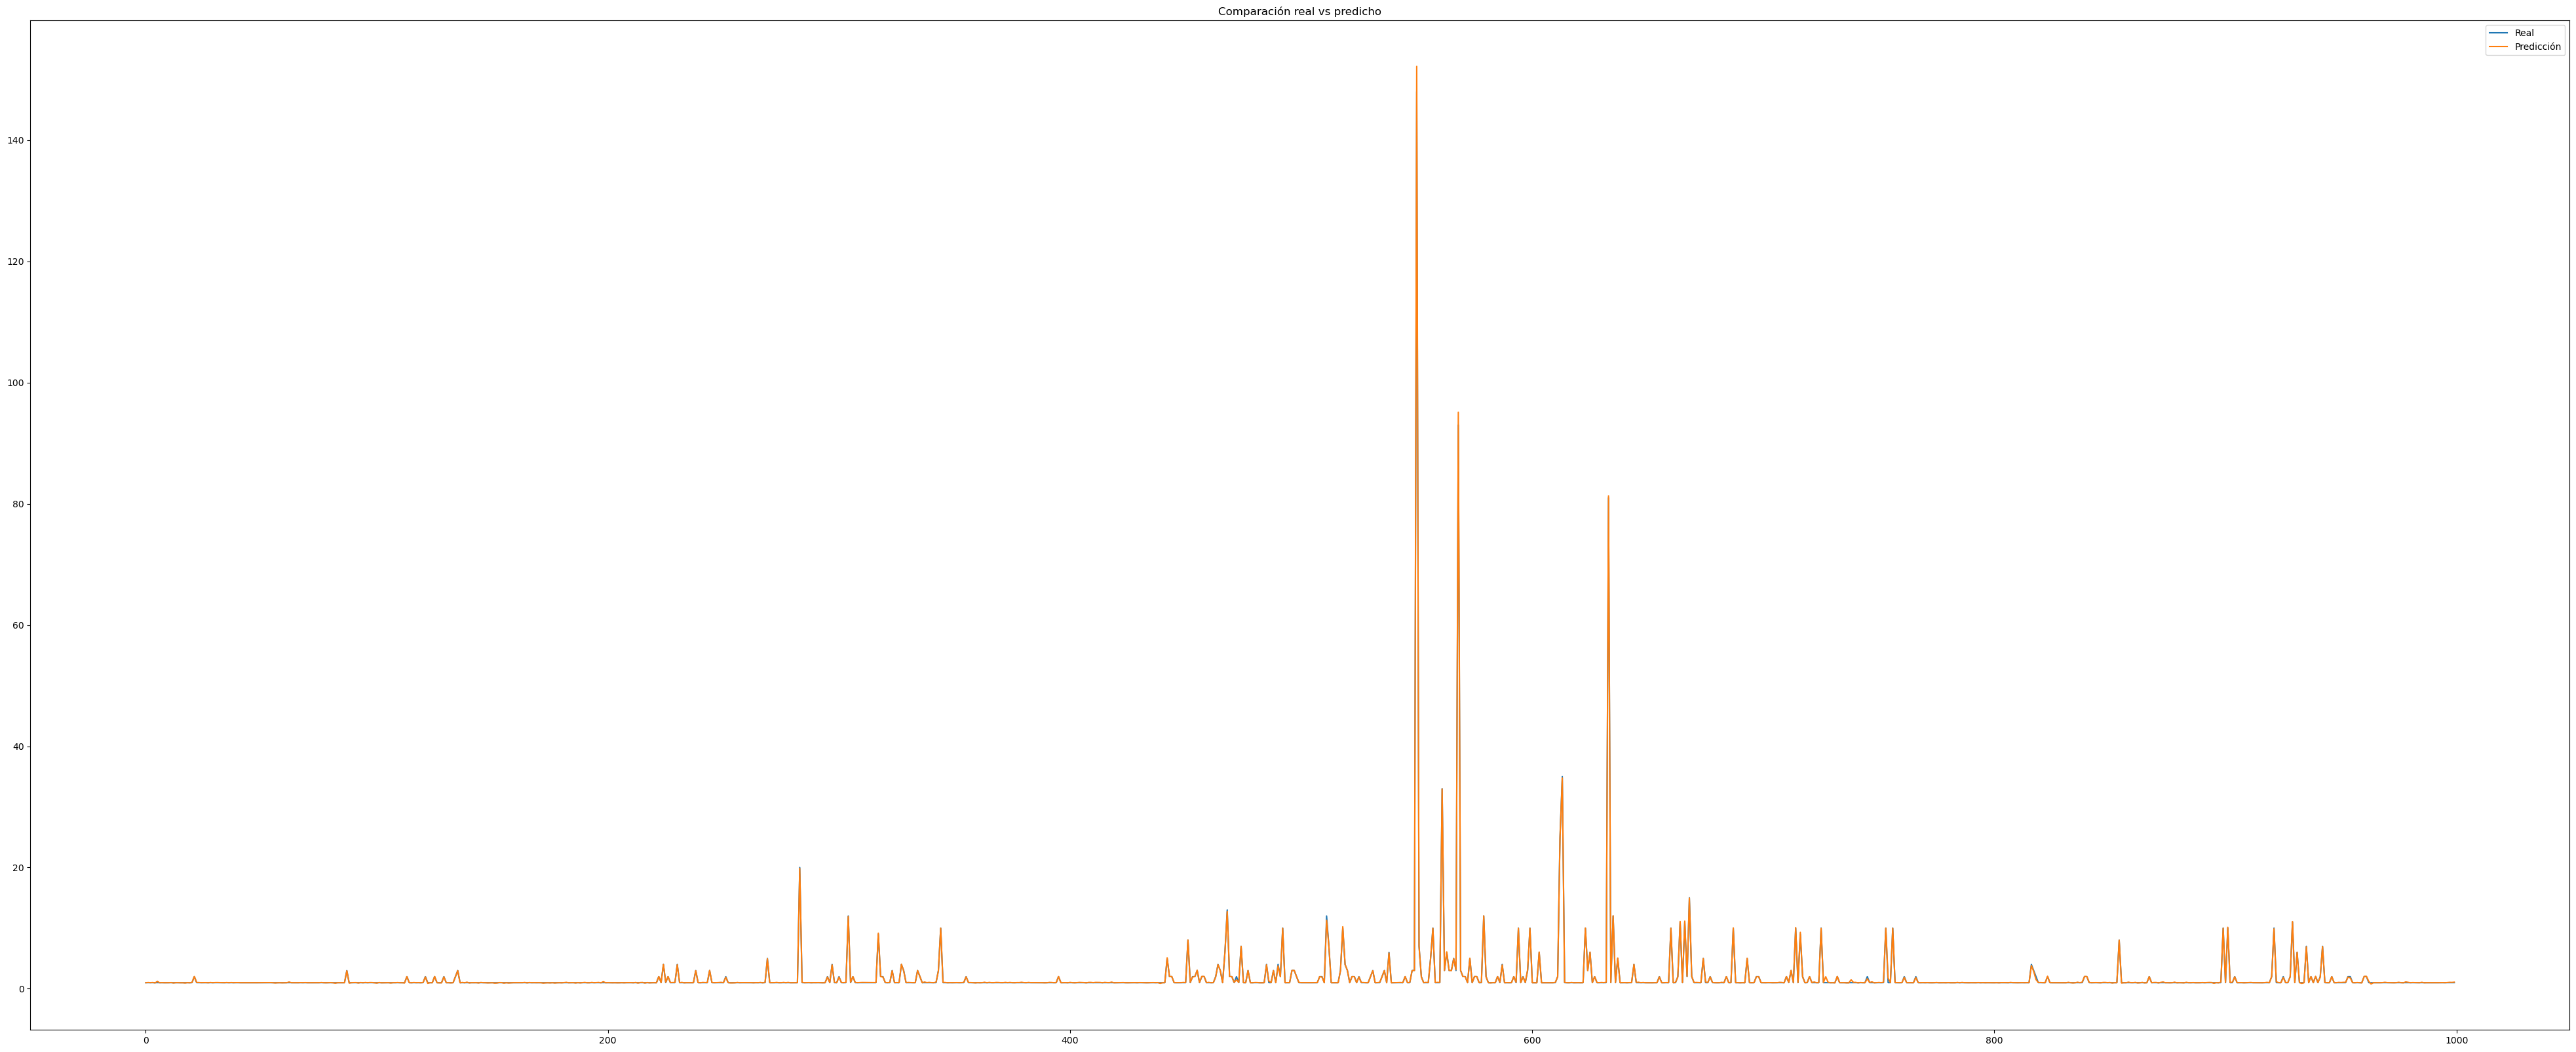

In [46]:
n = 1000

plt.figure(figsize=(50,20))
plt.plot(df_reco['Valor_Real'].values[:n], label='Real')
plt.plot(df_reco['Prediccion'].values[:n], label='Predicción')
plt.legend()
plt.title("Comparación real vs predicho")
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Por año 📑 </p>   

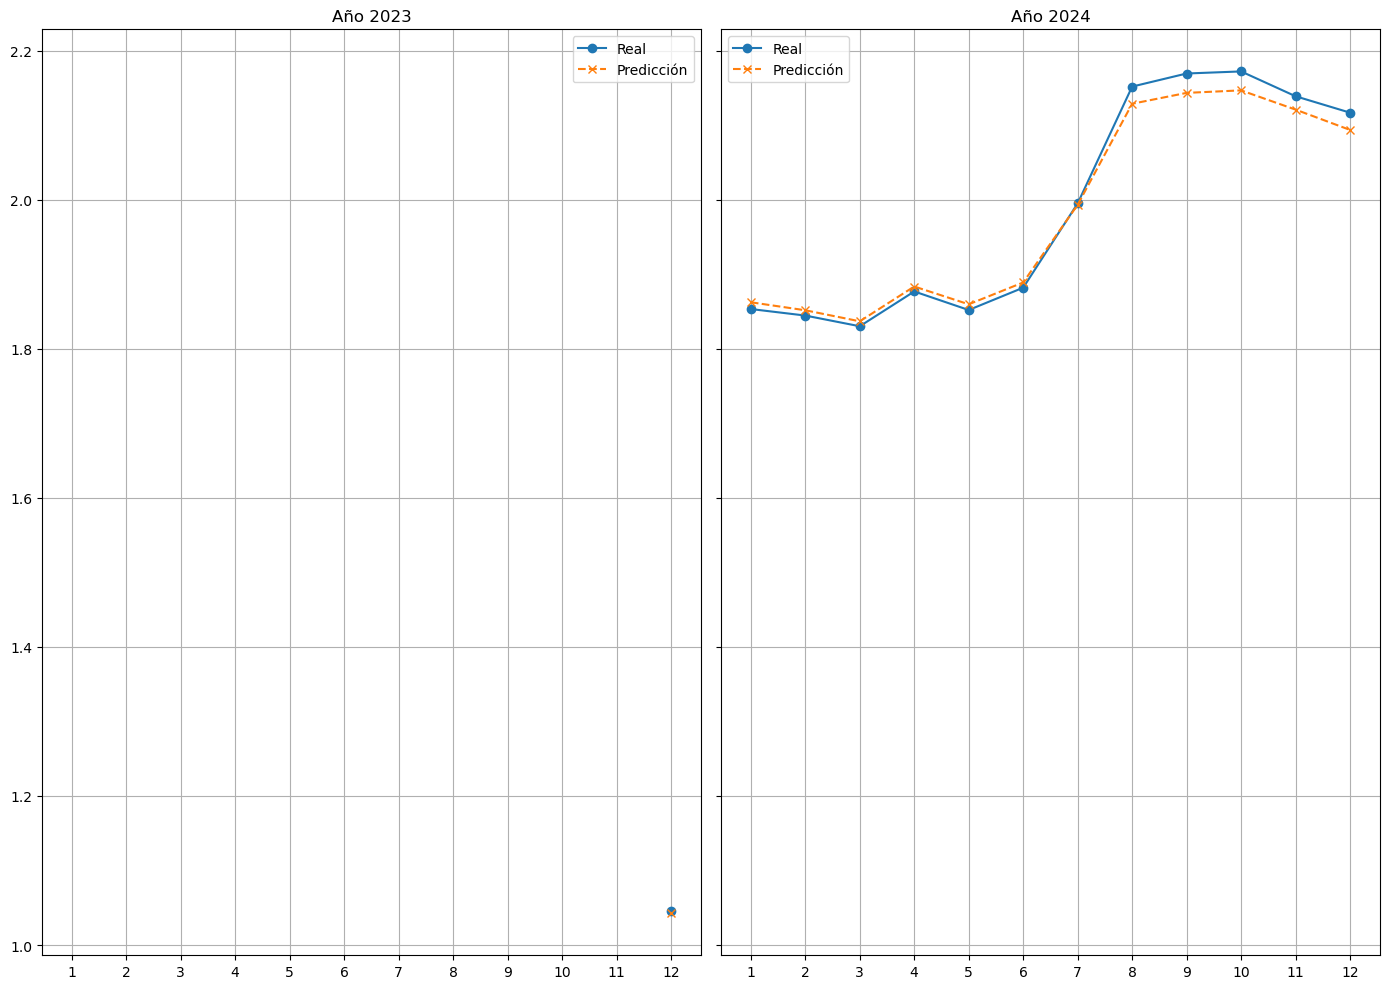

In [47]:
df_mes = df_reco.groupby(['Year', 'Month'])[['Valor_Real', 'Prediccion']].mean().reset_index()

años = sorted(df_mes['Year'].unique())
fig, axes = plt.subplots(nrows=len(años)//2, ncols=2, figsize=(14, 10), sharex=True, sharey=True)

for ax, año in zip(axes.flat, años):
    datos = df_mes[df_mes['Year'] == año]
    ax.plot(datos['Month'], datos['Valor_Real'], label='Real', marker='o')
    ax.plot(datos['Month'], datos['Prediccion'], label='Predicción', marker='x', linestyle='--')
    ax.set_title(f"Año {año}")
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Por Municipio 📑 </p>    

In [48]:
df_reco.columns

Index(['Date', 'Year', 'Month', 'Day', 'Nombre_Oficina_Arp',
       'Nombre_Municipio_IPS2', 'MUNICIPIO', 'Nombre_Tipo_Atencion_Arp',
       'Valor_Real', 'Prediccion', 'Error_Absoluto', 'Error_Relativo',
       'Es_Pico'],
      dtype='object')

In [49]:
municipio_ips = df_reco['Nombre_Municipio_IPS2'].value_counts().reset_index()
municipio_ips.columns = ['Municipio IPS', 'Frecuencia']

print(municipio_ips)

        Municipio IPS  Frecuencia
0            MEDELLIN      849980
1              BOGOTA       99673
2    SANTIAGO DE CALI       61929
3        BARRANQUILLA       27656
4         BUCARAMANGA       25980
..                ...         ...
158     PUERTO TEJADA          90
159            FRESNO          77
160           DABEIBA          57
161           PRADERA           5
162            LERIDA           2

[163 rows x 2 columns]


In [50]:
municipio = 'BOGOTA'

df_municipio = df_reco[df_reco['Nombre_Municipio_IPS2'] == municipio].copy()

df_municipio.head()

,Date,Year,Month,Day,Nombre_Oficina_Arp,Nombre_Municipio_IPS2,MUNICIPIO,Nombre_Tipo_Atencion_Arp,Valor_Real,Prediccion,Error_Absoluto,Error_Relativo,Es_Pico
0,2023-12-31,2023,12,31,OFICINA BOGOTA,BOGOTA,RICAURTE-CUNDINAMARCA,AMBULATORIA,1,0.990120,0.009880,0.009880,False
2,2023-12-31,2023,12,31,OFICINA BOGOTA,BOGOTA,BOGOTA,QUIRURGICO AMBULATORIO,1,1.000766,0.000766,0.000766,False
7,2023-12-31,2023,12,31,OFICINA MEDELLIN,BOGOTA,LA UNION-ANTIOQUIA,AMBULATORIA,1,1.005405,0.005405,0.005405,False
9,2023-12-31,2023,12,31,OFICINA BOGOTA,BOGOTA,RICAURTE-CUNDINAMARCA,AMBULATORIA,1,0.988155,0.011845,0.011845,False
11,2023-12-31,2023,12,31,OFICINA BOGOTA,BOGOTA,BOGOTA,AMBULATORIA,1,1.020713,0.020713,0.020713,False


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Por Municipio y Mes 📑 </p>    

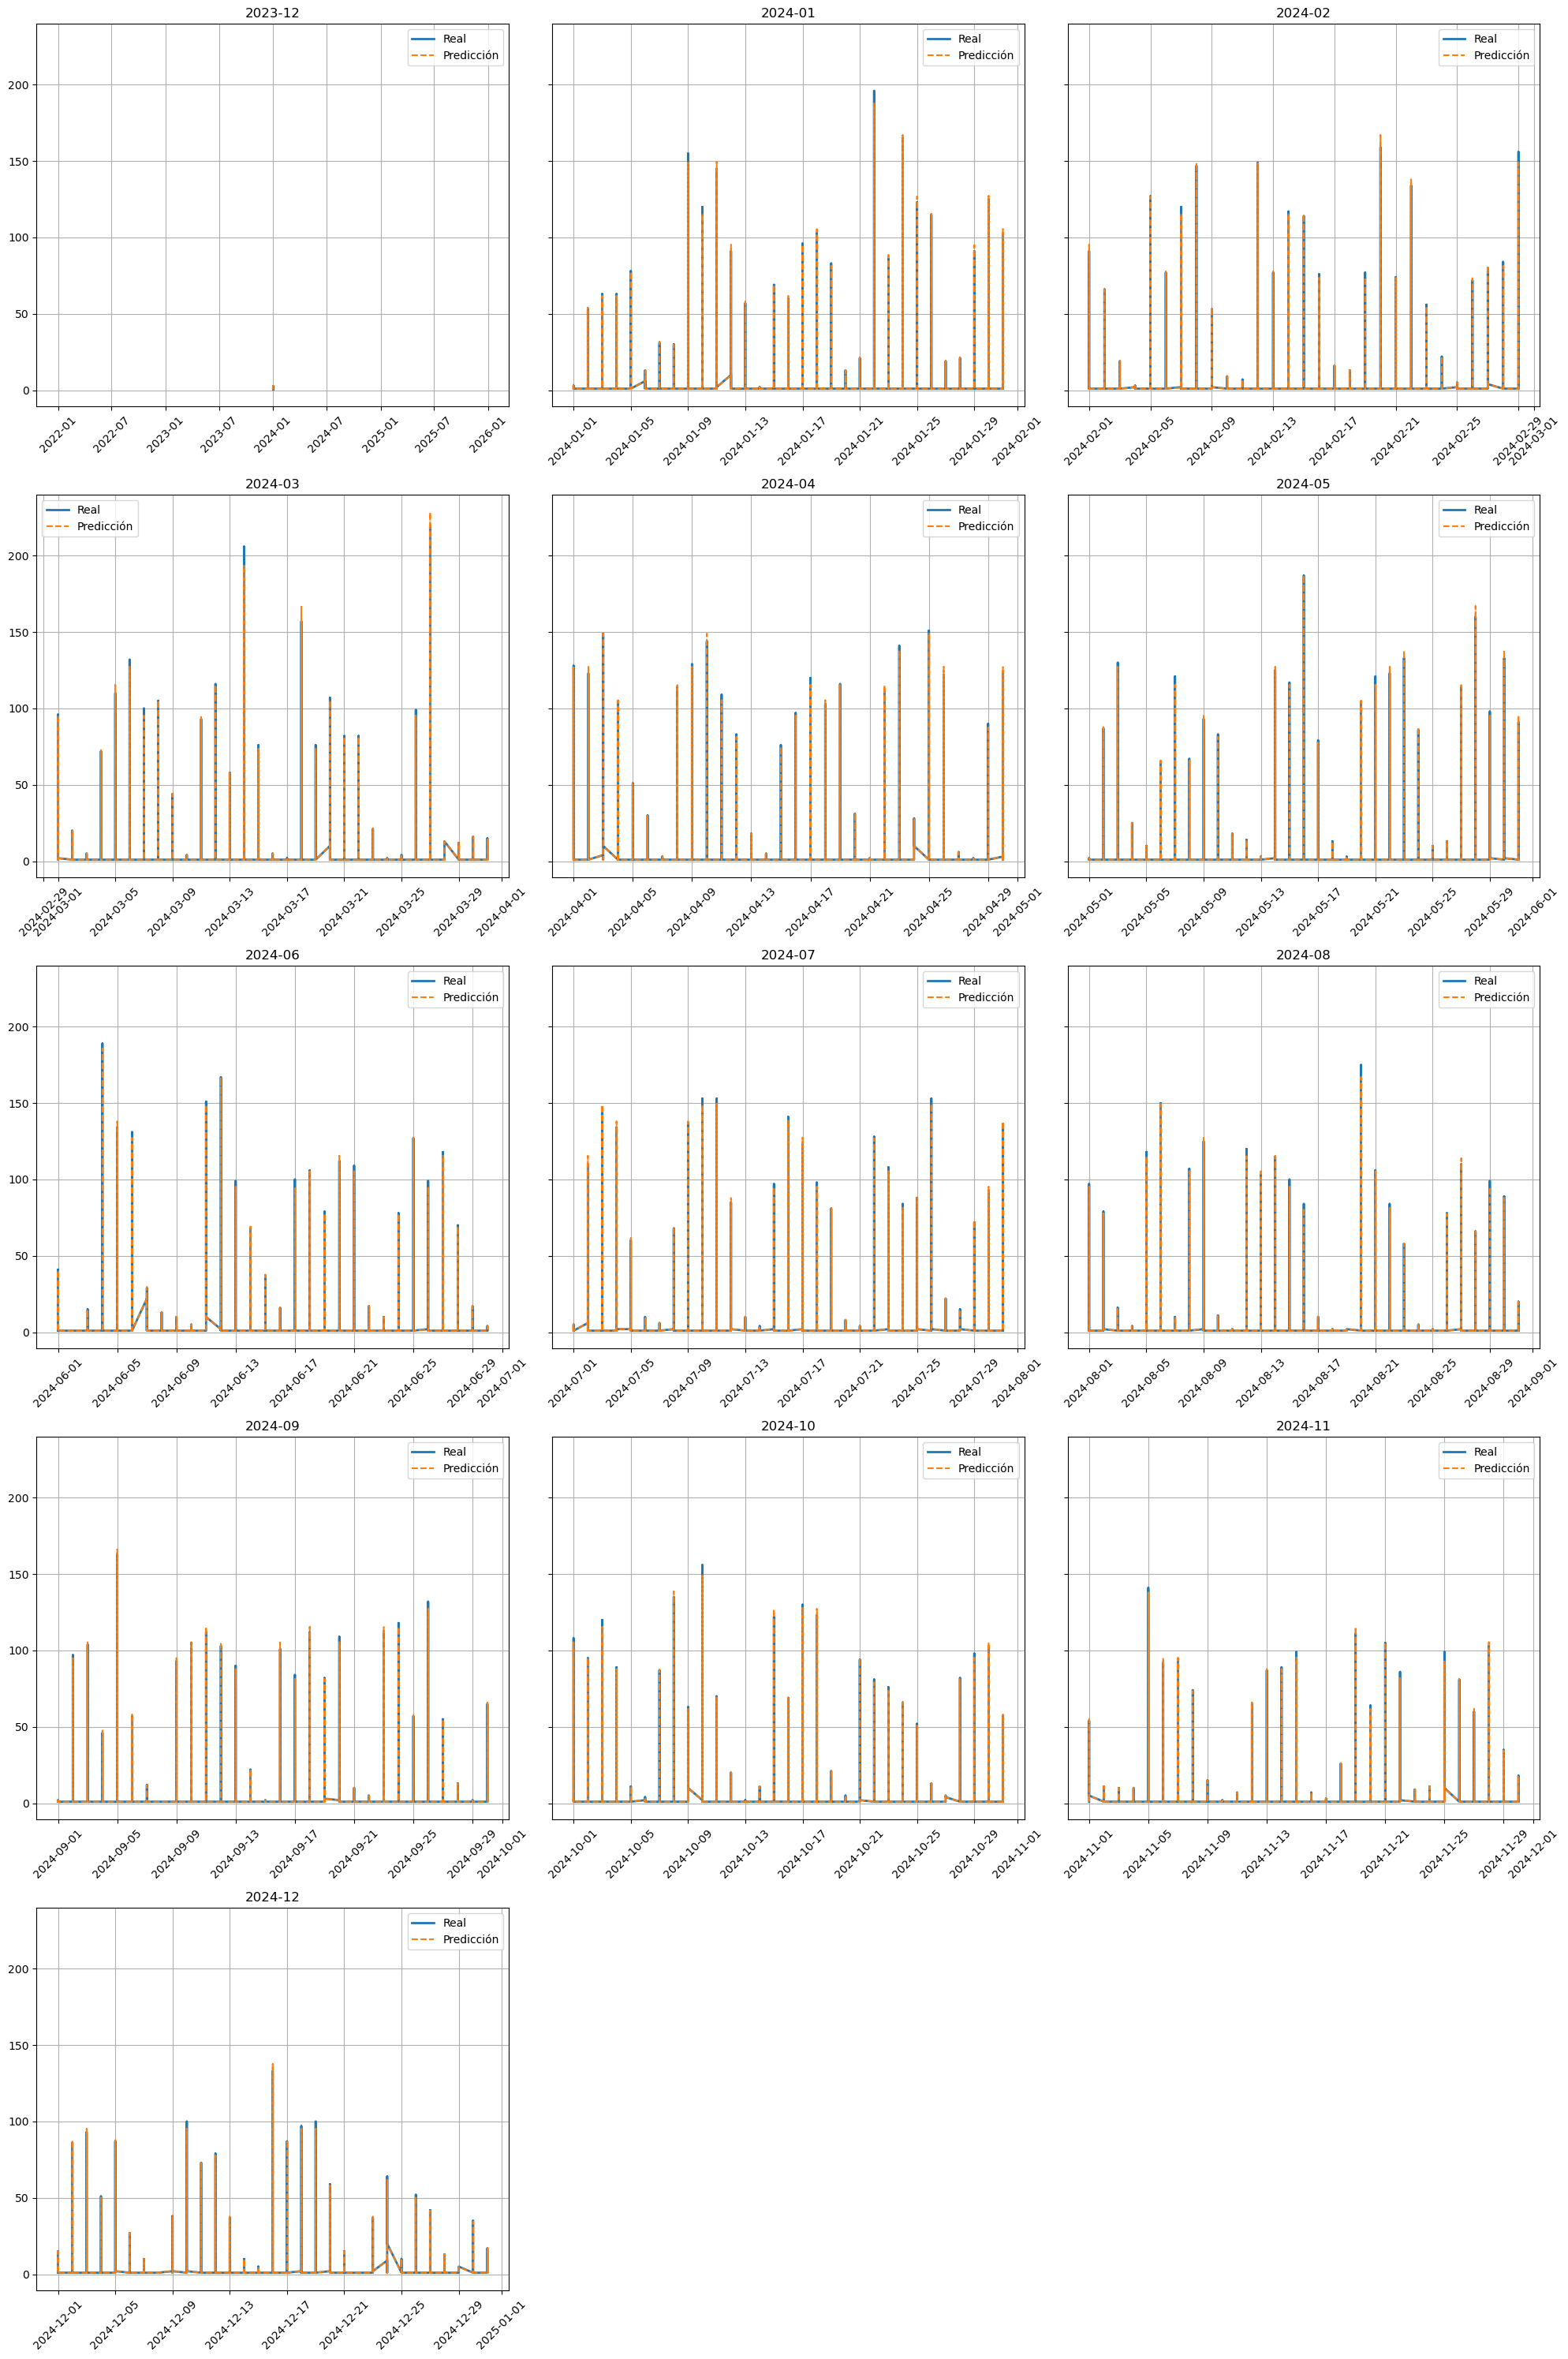

In [51]:
grupos = df_municipio.groupby(['Year', 'Month'])
n_graficas = len(grupos)

# 4. Crear subplots (ajustar layout según número de meses)
filas = (n_graficas + 2) // 3  # 3 columnas por fila
fig, axes = plt.subplots(filas, 3, figsize=(20, 6 * filas), sharey=True)
axes = axes.flatten()

# 5. Graficar cada mes en su subplot
for i, ((año, mes), df_mes) in enumerate(grupos):
    df_mes = df_mes.sort_values('Date')

    axes[i].plot(df_mes['Date'], df_mes['Valor_Real'], label='Real', linewidth=2)
    axes[i].plot(df_mes['Date'], df_mes['Prediccion'], label='Predicción', linestyle='--')
    axes[i].set_title(f'{año}-{str(mes).zfill(2)}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True)
    axes[i].legend()

# 6. Limpiar subplots vacíos (si hay más subplots que meses)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Por Municipio, Mes y Servicio 📑 </p>  

In [52]:
def mostrar_grafica_mes(mes, año):
    # Filtrar datos del mes y municipio
    df_mes = df_reco[
        (df_reco['Month'] == mes) &
        (df_reco['Year'] == año) &
        (df_reco['Nombre_Municipio_IPS2'] == municipio)
    ].copy()

    df_mes = df_mes.sort_values('Date')

    # Obtener lista de servicios únicos en ese mes/municipio
    servicios = df_mes['Nombre_Tipo_Atencion_Arp'].unique()

    # Crear subgráficas, una por servicio
    fig, axes = plt.subplots(len(servicios), 1, figsize=(14, 4 * len(servicios)), sharex=True)

    # Si solo hay un servicio, axes no es iterable → convertirlo a lista
    if len(servicios) == 1:
        axes = [axes]

    for i, tipo in enumerate(servicios):
        df_sub = df_mes[df_mes['Nombre_Tipo_Atencion_Arp'] == tipo]
        axes[i].plot(df_sub['Date'], df_sub['Valor_Real'], label='Real', linewidth=2)
        axes[i].plot(df_sub['Date'], df_sub['Prediccion'], label='Predicción', linestyle='--', linewidth=2)
        axes[i].set_title(f"{municipio} - {año}-{str(mes).zfill(2)} | Servicio: {tipo}", fontsize=12)
        axes[i].set_ylabel("Cantidad")
        axes[i].legend()
        axes[i].grid(True)

    axes[-1].set_xlabel("Fecha")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

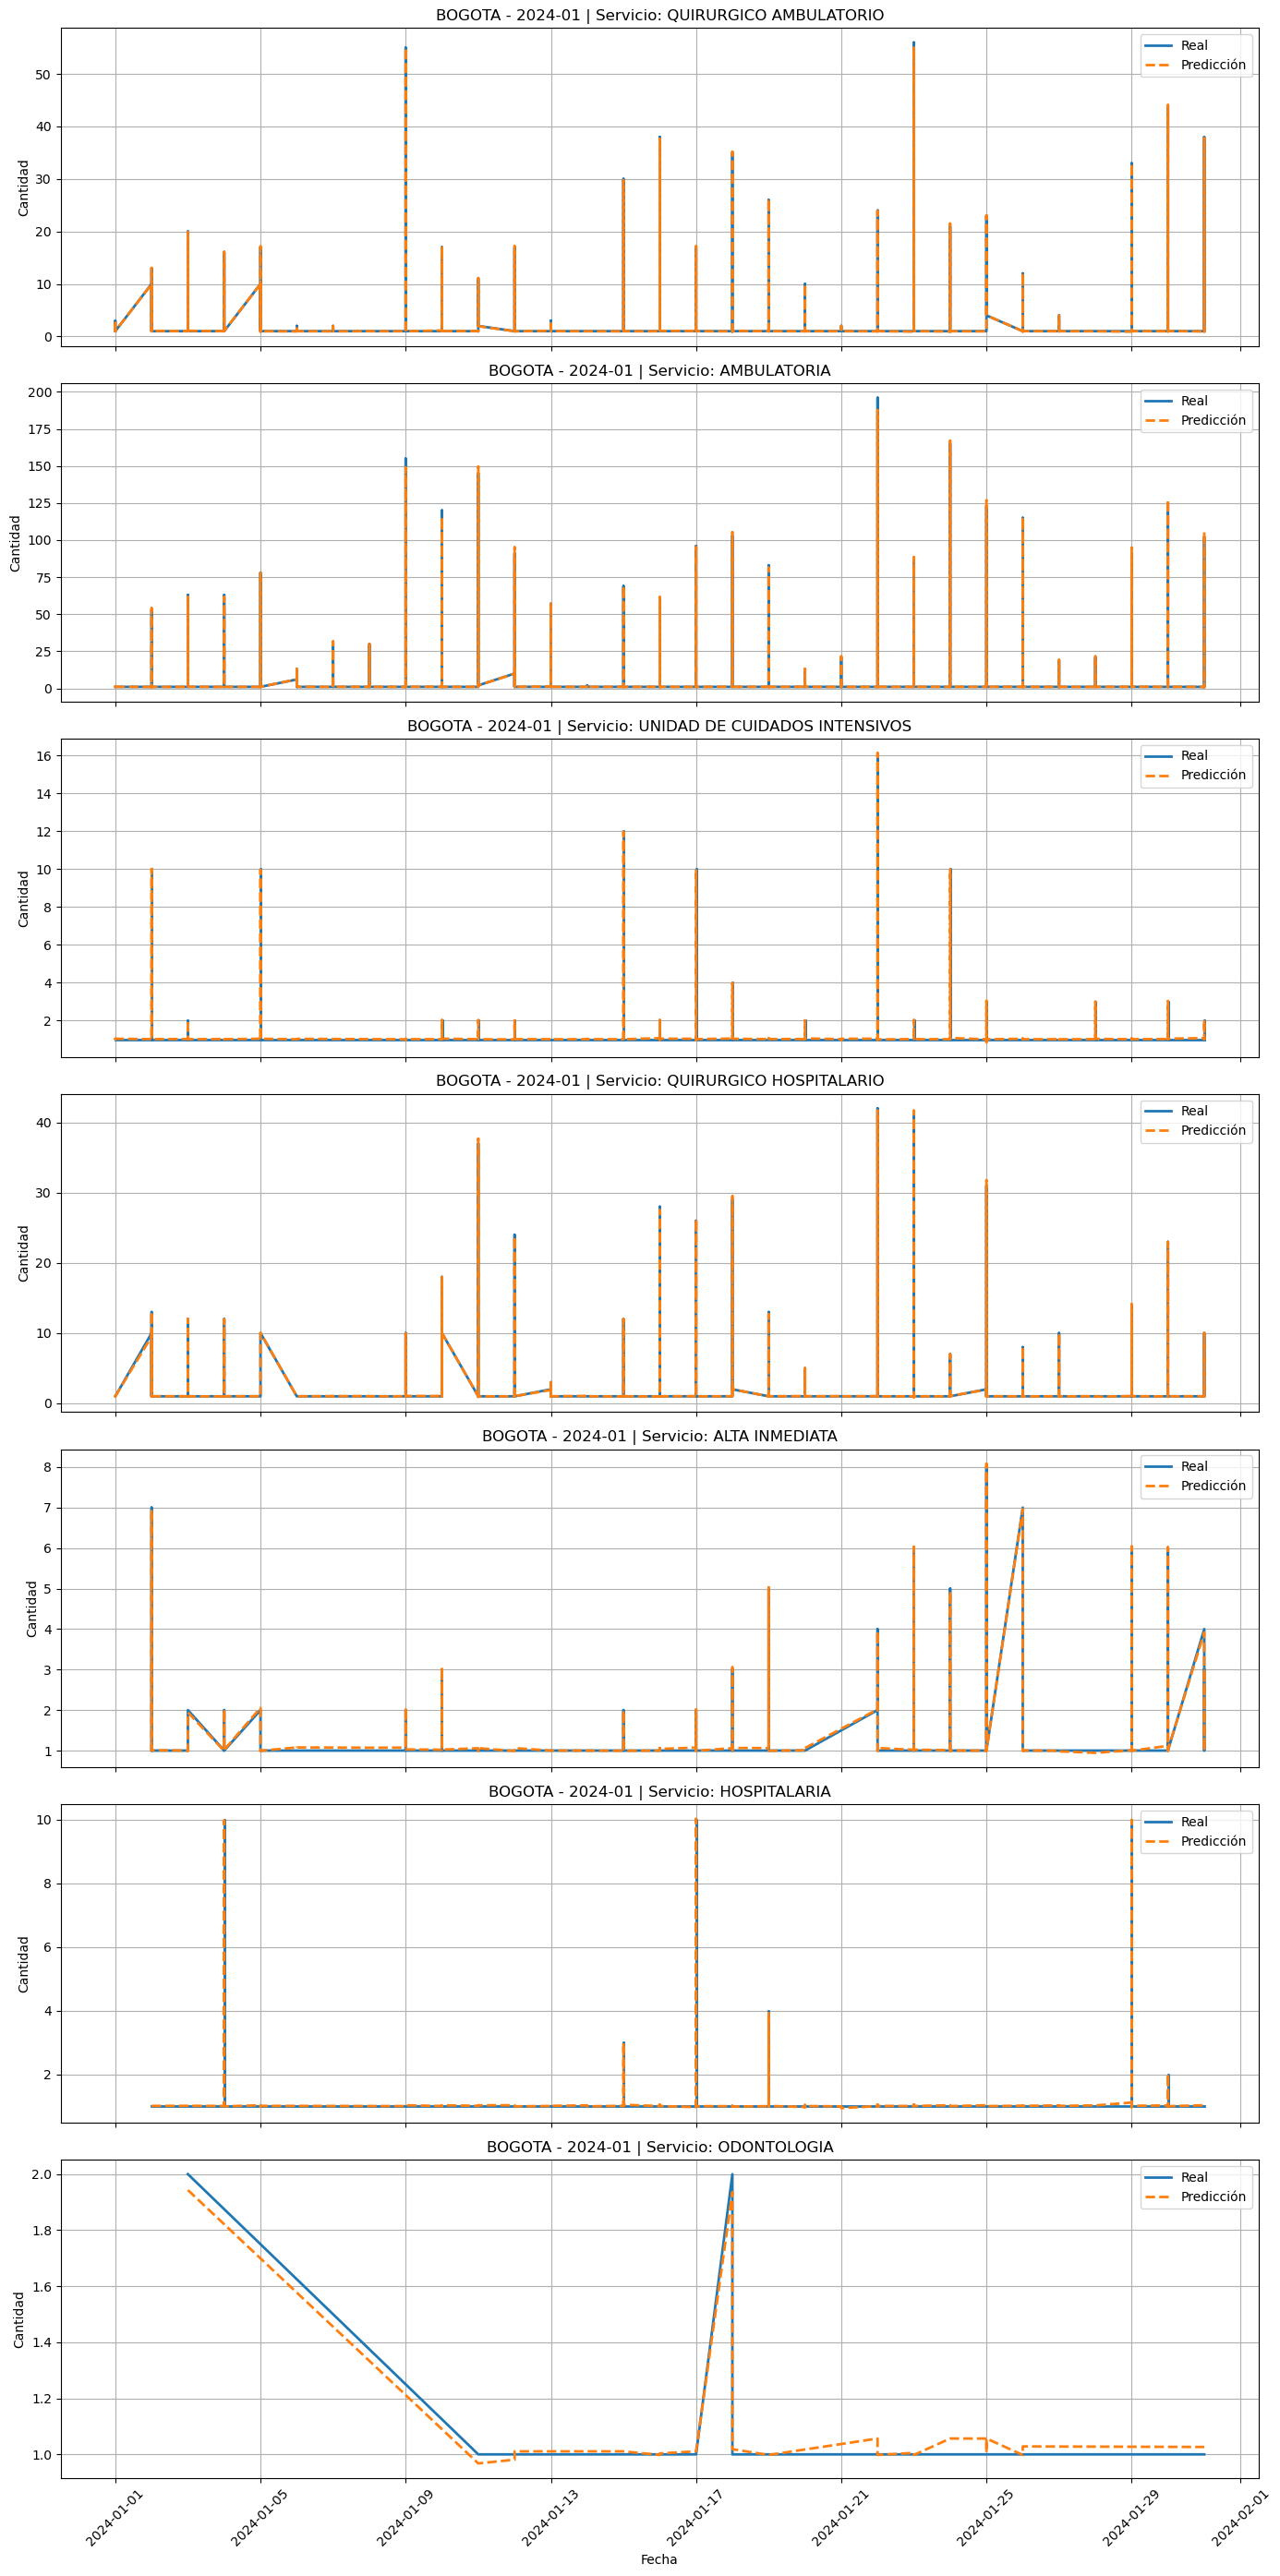

In [53]:
# Mostrar grafica para marzo 2023 en Bogotá
mostrar_grafica_mes(mes=1, año=2024)